# DEL 1

### 1.1. Hur hänger AI, ML och DL ihop?

- AI (Artificiell intelligens): Det breda området som syftar till att skapa maskiner som kan utföra uppgifter som normalt kräver mänsklig intelligens.
- ML (Maskininlärning): Ett delområde inom AI som bygger på att datorer lär sig mönster från data utan att vara explicit programmerade.
- DL (Djupinlärning): Ett delområde inom ML som använder neurala nätverk med många lager ("deep neural networks") för att modellera mycket komplexa samband.
- Hierarki: AI -> ML -> DL


### 1.2. De fyra problemkategorierna inom ML


- Supervised learning – vi har in- och utdata (labels), t.ex. regression eller klassificering.
- Unsupervised learning – vi har bara indata, vill hitta mönster, t.ex. klustring.
- Reinforcement learning – en agent lär sig genom trial-and-error via belöningar/straff.
- Semi-supervised learning – en blandning: lite data är märkt (labels), resten omärkt.

### 1.3. Förklaringar

a) Tränings-, validerings- och testdata
- Träningsdata: används för att lära modellen.
- Valideringsdata: används för att justera hyperparametrar och undvika överanpassning.
- Testdata: används enbart i slutet för att mäta generaliseringsförmågan.

b) K-delad korsvalidering (k-fold cross-validation)
- Data delas upp i k lika stora delar ("folds").
- Träning sker på k-1 delar och test på den återstående.
- Upprepas k gånger så att alla delar används som test en gång.
- Resultaten snittas -> robustare uppskattning av modellens prestanda.

c) RMSE (Root Mean Squared Error)
Ett mått på skillnaden mellan förutsagda och verkliga värden.
Formel: 
- RMSE = √(1/n ∑(y_pred - y_true)²)
- Tolkas som "genomsnittligt fel i samma enhet som y".

d) Parameter vs hyperparameter
- Parameter: Lärs av modellen (t.ex. vikter i en linjär regression).
- Hyperparameter: Ställs in innan träning, styr lärandet (t.ex. learning rate, antal träd i Random Forest).

e) Grid search (GridSearchCV)
- Testar systematiskt alla kombinationer av hyperparametrar i ett "rutnät" (grid).
- "Search" -> sökning efter bästa kombination.
- refit=True: när bästa kombination hittats tränas en slutlig modell om på hela träningsdatamängden med dessa inställningar.

f) Kategorisk data
- Nominal data: Kategorier utan ordning (ex. färg: röd, blå, grön).
- Ordinal data: Kategorier med naturlig ordning (ex. betyg: lågt, medel, högt).
Hantering:
- One-hot encoding: ny binär kolumn för varje kategori.
- Dummy-variable encoding: liknar one-hot men utesluter en kategori (för att undvika multikollinearitet).
- Ordinal encoding: ersätter kategorier med heltal som reflekterar ordningen.

g) Feature engineering
- Processen att skapa, transformera eller välja variabler ("features") för att förbättra modellens prestanda. Ex: log-transformera variabler, skapa interaktionstermer, extrahera datumfunktioner (månad, veckodag).

h) Principle of parsimony (Occam’s razor)
- En enklare modell föredras framför en mer komplex om båda förklarar datan ungefär lika bra.

### 1.4. En modell är en förenkling av verkligheten

Alla modeller reducerar verkligheten till matematiska samband. T.ex. en regressionsmodell som förutspår bostadspriser kan aldrig fånga alla faktorer i verkligheten (politik, känslor, mode) -> men det räcker ofta med en förenkling.


### 1.5. Överanpassning (overfitting)

När en modell lär sig "brus" eller detaljer i träningsdatan som inte generaliserar till ny data.
- Resultat: hög träffsäkerhet på träning, låg på test.


### 1.6. Högre är bättre i scikit-learn scoring

Scikit-learn designar scoring-metriker så att ett högre värde alltid betyder bättre resultat. Därför används t.ex. neg_mean_squared_error, eftersom MSE normalt är "lägre är bättre". Genom att ta det negativa kan samma logik ("högre är bättre") behållas.

### 1.7. Datakategorier

- Tvärsnittsdata: Samlas in vid en viss tidpunkt. Ex: enkätsvar från 1000 personer 2025.
- Tidsseriedata: Samlas in över tid. Ex: aktiekurser per dag.
- Paneldata / Longitudinaldata: Kombination av båda – flera enheter observeras över tid. Ex: årlig inkomst för 500 personer under 10 år.


### 1.8. Verkliga tillämpningsområden inom ML

Exempel (nutida trender):
- Hälsosektorn: Diagnos från röntgenbilder (deep learning).
- Finans: Kreditbedömning, algoritmisk handel.
- Transport: Självkörande bilar.
- Handel: Rekommendationssystem (Netflix, Spotify, Amazon).
- Industri: Prediktivt underhåll (förutse när maskiner går sönder).
- Språk & text: Chatbots, översättning, sentimentanalys.

### 1.9. Logiken bakom neg_mean_squared_error

- MSE: lägre = bättre.
- Scikit-learn scoring: konvention = högre = bättre.
- Därför multipliceras MSE med -1 → så att bästa modell har högst (minst negativt) värde.

### 1.10. Koduppgifter

In [ ]:
from sklearn.model_selection import train_test_split
help(train_test_split)

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

### 1.11. Varför proportionerna blir 60–20–20

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42)

Första splitten:
- test_size=0.2 -> 20% av datan hamnar i test set.
- Resten, 80%, blir train_full.

Andra splitten:
- Vi delar upp train_full (80%) i train och validation.
- test_size=0.25 -> 25% av dessa 80% blir validation set.
- 25% av 80% = 0.25 × 80% = 20% av hela datan.
- Resten blir 60% av hela datan (train).

Slutresultat:
- 60% train
- 20% validation
- 20% test

# DEL 2

### 2.1. Checklistan med sju steg

1. Definiera problemet och skapa en helhetsbild 
* Klargör målet med projektet, varför det är relevant och hur framgång ska mätas. Identifiera intressenter och möjliga befintliga lösningar.

2. Få tillgång till datan
* Säkerställ vilken data som behövs, hur den kan samlas in och om den kan hanteras på ett lagenligt sätt. Dela upp i tränings-, validerings- och testdata.

3. Utforska datan (EDA)
* Analysera datan statistiskt och visuellt för att förstå mönster, samband och eventuella problem. Avgör om ML-modellering faktiskt behövs eller om enklare analys räcker.

4. Bearbeta datan
* Genomför data cleaning och transformationer, hantera saknade värden, outliers och irrelevanta variabler. Eventuell feature engineering görs här.

5. ML-modellering
* Testa olika modeller, justera hyperparametrar, gör variabelselektion och utvärdera prestanda på valideringsdata. Slutligen utvärderas generaliseringsförmågan på testdatan.

6. Presentera lösningen för intressenter
* Anpassa presentationen efter målgruppen. Tekniska intressenter vill ha detaljer, medan beslutsfattare ofta vill ha resultat och konsekvenser. Visualiseringar är ofta viktiga.

7. Produktionssättning och övervakning
* Implementera modellen i praktiken, följ upp dess prestanda över tid och säkerställ att den fortsätter fungera när ny data tillkommer. Modellen kan behöva uppdateras eller tränas om.

### 2.2. Vad menas med att en modell produktionssätts?

Att produktionssätta en modell innebär att den inte bara är en prototyp eller ett experiment, utan att den integreras i ett verkligt system där den används kontinuerligt. Exempel: en rekommendationsmotor på Netflix som kör i realtid. Produktionssättning kräver ofta:
- Skalbarhet (hantera många förfrågningar)
- Övervakning (kontroll av prestanda över tid)
- Möjlighet till uppdateringar och reträning

### 2.3. Vad är scikit-learn?

Scikit-learn är ett populärt Python-bibliotek för maskininlärning. Det används för klassificering, regression, klustring, dimensionreduktion, modellval och förbehandling av data.

Centrala designprinciper:
- Enkelhet och konsistens (samma API för olika modeller)
- Moduläritet (kombinera komponenter enkelt)
- Återanvändbarhet (pipelines)
- Öppenhet och dokumentation

### 2.4. Vad är TensorFlow och Keras?

TensorFlow: Ett ramverk utvecklat av Google för att bygga och träna neurala nätverk. Det är kraftfullt men ganska komplext.

Keras: Ett högre abstraktionslager ovanpå TensorFlow (numera integrerat i TensorFlow). Det gör det enklare och mer användarvänligt att bygga neurala nätverk.

### 2.5. Dialogen mellan Kalle och Stina

Kalle har delvis rätt i att man vill förbättra modellen om den presterar dåligt.

Men Stina har rätt i att man får inte använda testdatan för modelljustering, eftersom testdatan ska vara en "helt ny" utvärdering av den slutgiltiga modellen.

Rätt tillvägagångssätt är att dela upp i träning, validering och test:
- Träning används för att lära modellen.
- Validering används för hyperparametrar och modellval.
- Test används enbart för slutgiltig utvärdering.

### 2.6. Varför många AI/ML-projekt inte når målen

- Dålig datakvalitet (för lite data, felaktig data, bias).
- Otydliga mål (projektet drivs av teknik, inte av ett verkligt behov).
- Överoptimism (förväntar sig "magiska lösningar").
- Brist på domänkunskap (algoritmen kanske funkar, men problemet var fel definierat).
- Svårigheter med produktionssättning (svårt att integrera med befintliga system).

### 2.7. ??

### 2.8. Förklara koden

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from joblib import dump, load

X, y = make_regression(n_samples=20000, n_features=3, noise=0.1)
model = LinearRegression().fit(X, y)
dump(model, "linear_model.joblib")
model_loaded = load("linear_model.joblib")
print(model_loaded.predict(X[:5]))

[-82.41475131  -0.32991287 -19.25320566  42.91759848  94.849153  ]


- make_regression(...): Skapar ett syntetiskt dataset för regression med 20 000 exempel, 3 features och lite brus.
- LinearRegression().fit(X, y): Tränar en linjär regressionsmodell på datan.
- dump(model, "linear_model.joblib"): Sparar modellen i en fil på disk.
- load("linear_model.joblib"): Läser in den sparade modellen.
- predict(X[:5]): Gör prediktioner på de 5 första datapunkterna.

### 2.9. Flöde för regression med datasetet data_01.csv

Linear RMSE: 3.592300959691068
Tree RMSE: 99.3594190386419
Test RMSE: 3.3715490775155392


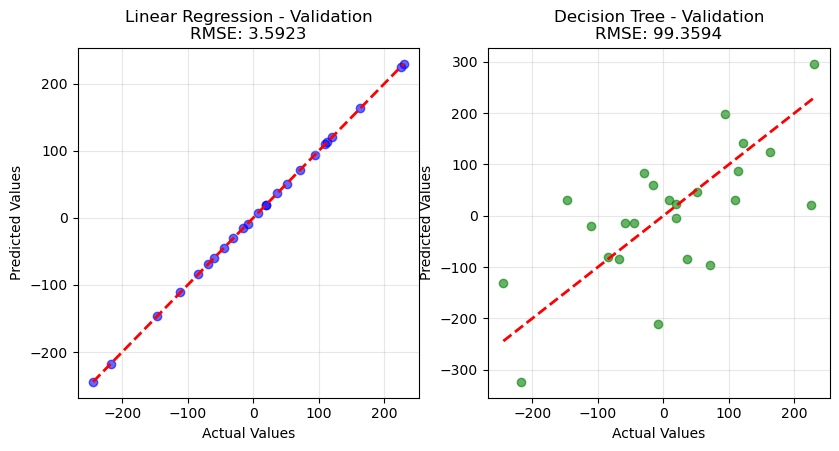

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

# a) Läs in datasetet
df = pd.read_csv("data_01.csv")

# b) Dela upp i X och y
X = df.drop("target", axis=1)
y = df["target"]

# c) Dela upp i train, val, test
# Först train + val och test (_val o _full samma (man kan kalla det vad man vill.))
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sedan train och val
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

# d) Träna två regressionsmodeller

lin_reg = LinearRegression().fit(X_train, y_train)
tree_reg = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

# e) Utvärdera på valideringsdata
lin_pred = lin_reg.predict(X_val)
tree_pred = tree_reg.predict(X_val)

lin_rmse = root_mean_squared_error(y_val, lin_pred)
tree_rmse = root_mean_squared_error(y_val, tree_pred)


lin_pred_val = lin_reg.predict(X_val)
tree_pred_val = tree_reg.predict(X_val)

print("Linear RMSE:", lin_rmse)
print("Tree RMSE:", tree_rmse)

# f) Välj bästa modell och träna om på train + val
best_model = lin_reg if lin_rmse < tree_rmse else tree_reg
best_model.fit(X_train_val, y_train_val)

# g) Utvärdera på testdatan
test_pred = best_model.predict(X_test)
test_rmse = root_mean_squared_error(y_test, test_pred)
print("Test RMSE:", test_rmse)

# h) Träna på hela datasetet
final_model = best_model.fit(X, y)

## Visa plots på Values och Predicted Val
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(y_val, y_val, alpha=0.6, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Linear Regression - Validation\nRMSE: {lin_rmse:.4f}')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
plt.scatter(y_val, tree_pred_val, alpha=0.6, color='green')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Decision Tree - Validation\nRMSE: {tree_rmse:.4f}')
plt.grid(True, alpha=0.3)




In [68]:
# plt.scatter(X, y, alpha=0.6, color='green')
print( X_val.shape)
print(y_val.shape)


(24, 5)
(24,)


### 2.10. Flöde för salary_dataset.csv

In [ ]:
# a) Läs in och dela upp
df = pd.read_csv("salary_dataset.csv")
X = df[["YearsExperience"]]   # Oberoende variabel // Input
y = df["Salary"]              # Beroende variabel // Output

In [13]:
# b) Train/test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# c) Träna två modeller med k-korsvalidering
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)

scoring = "neg_root_mean_squared_error"

lin_scores = cross_validate(lin_reg, X_train, y_train, scoring=scoring, cv=5, return_train_score=True)
tree_scores = cross_validate(tree_reg, X_train, y_train, scoring=scoring, cv=5, return_train_score=True)

print("Linear CV RMSE:", -lin_scores["test_score"].mean())
print("Tree CV RMSE:", -tree_scores["test_score"].mean())


Linear CV RMSE: 5293.2031969987775
Tree CV RMSE: 5611.57858424216


In [ ]:
# d) Välj bästa och utvärdera på testsetet
best_model = lin_reg if -lin_scores["test_score"].mean() < -tree_scores["test_score"].mean() else tree_reg
best_model.fit(X_train, y_train)

test_pred = best_model.predict(X_test)
test_rmse = root_mean_squared_error(y_test, test_pred)
print("Test RMSE:", test_rmse)

Test RMSE: 49830096.855908334


### 2.11. Arbeta med kategorisk data (mpg-datasetet)

Dataset shape: (398, 9)
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
Dataset shape after dropping NaN: (392, 9)
Test RMSE: 2.884
R² Score: 0.837


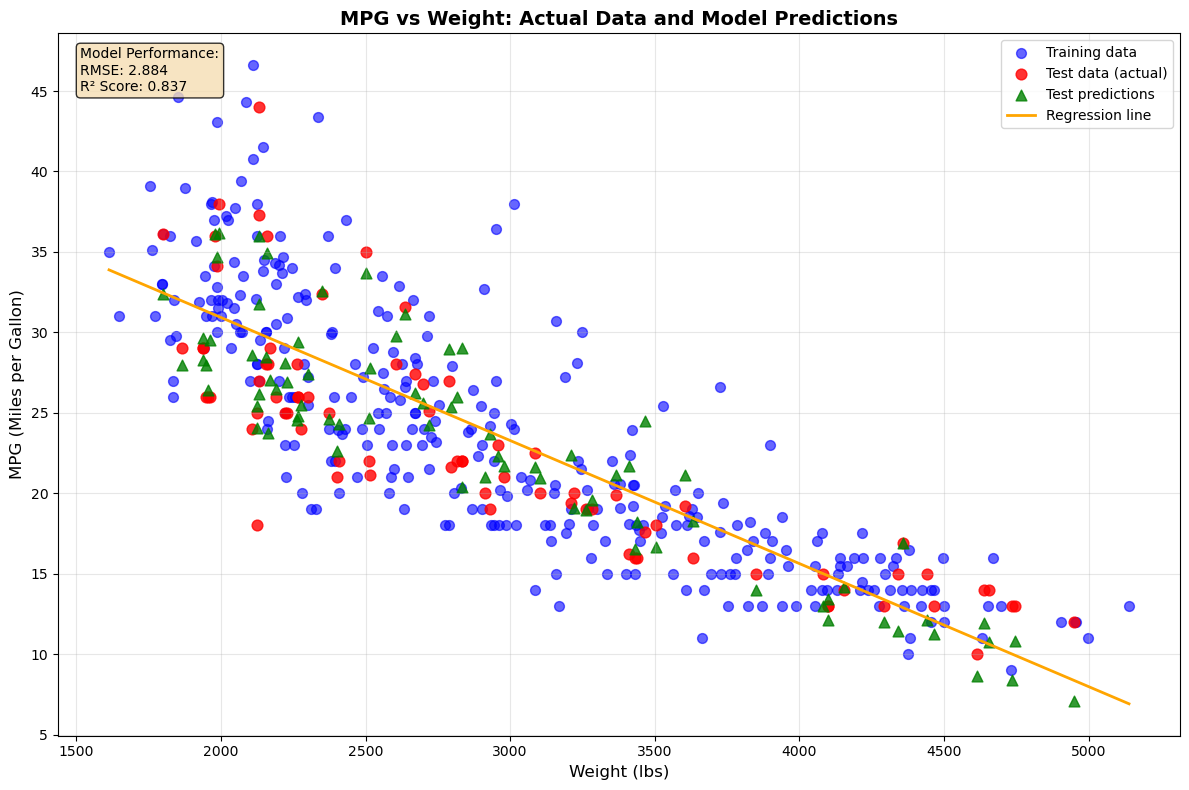


Korrelation mellan Weight och MPG: -0.832


In [49]:
# a) Läs in datasetet
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

plt.style.use('default')
sns.set_palette("husl")

df = sns.load_dataset("mpg")
print("Dataset shape:", df.shape)
print(df.head())

# b) Droppa rader med saknade värden
df = df.dropna()
print(f"Dataset shape after dropping NaN: {df.shape}")

# c) Droppa kolumnen name
df = df.drop("name", axis=1)

# d) One-hot encoding på origin
df = pd.get_dummies(df, columns=["origin", "model_year"], drop_first=True)

# e) Split into X and y
X = df.drop("mpg", axis=1)
y = df["mpg"]

# f) Train/test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# g) Träna och utvärdera linjär regression
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

##Plots
plt.figure(figsize=(12, 8))

# Få weight-värden från tränings- och testdata för plotting
weight_train = X_train['weight']
weight_test = X_test['weight']

# Plot träningsdata
plt.scatter(weight_train, y_train, alpha=0.6, color='blue', s=50, label='Training data')

# Plot testdata
plt.scatter(weight_test, y_test, alpha=0.8, color='red', s=60, label='Test data (actual)')

# Plot predictions för testdata
plt.scatter(weight_test, y_pred, alpha=0.8, color='green', s=60, 
           marker='^', label='Test predictions')

# Skapa en enkel univariat regression endast för weight vs mpg för att visa trendlinjen
weight_all = df['weight']
mpg_all = df['mpg']

# Fit enkel linjär regression för visualisering
simple_model = LinearRegression()
weight_reshaped = weight_all.values.reshape(-1, 1)
simple_model.fit(weight_reshaped, mpg_all)

# Skapa smooth line för prediction
weight_range = np.linspace(weight_all.min(), weight_all.max(), 100).reshape(-1, 1)
mpg_pred_line = simple_model.predict(weight_range)

plt.plot(weight_range, mpg_pred_line, color='orange', linewidth=2, 
         label=f'Regression line')

# Formatering
plt.xlabel('Weight (lbs)', fontsize=12)
plt.ylabel('MPG (Miles per Gallon)', fontsize=12)
plt.title('MPG vs Weight: Actual Data and Model Predictions', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Lägg till text med modellprestanda
plt.text(0.02, 0.98, f'Model Performance:\nRMSE: {rmse:.3f}\nR² Score: {r2:.3f}', 
         transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Visa korrelation mellan weight och mpg
correlation = df['weight'].corr(df['mpg'])
print(f"\nKorrelation mellan Weight och MPG: {correlation:.3f}")

# Visa feature importance från den fullständiga modellen
feature_names = X.columns
coefficients = model.coef_

2.11 SVENSK CONVERTED

Dataset shape: (398, 9)
Original data:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  

Data with Swedish units:
    mpg  mil_per_liter  weight    weight_kg
0  18.0       0.765257    3504  1589.386368
1  15.0       0.637714    3693  1675.115256
2  18.0       0.765257    3436  1558.542112
3  16.0       0.680229    3433  1557.1

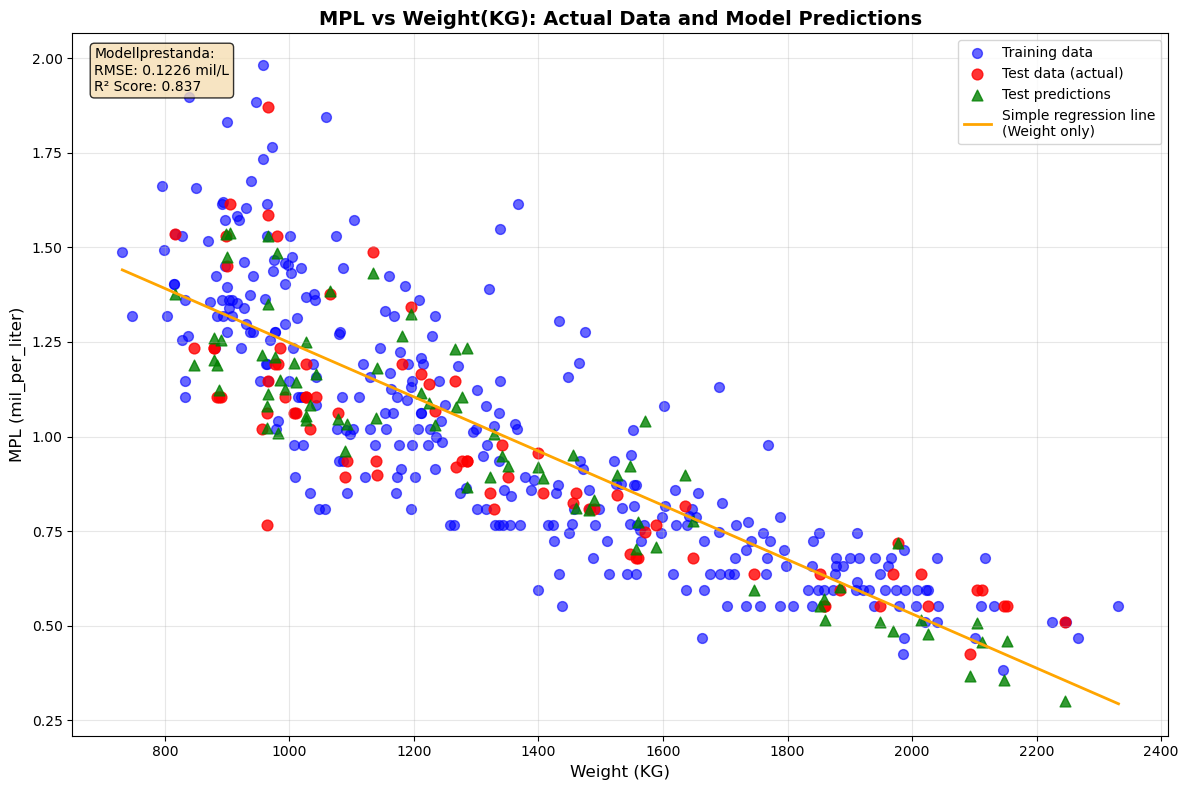


Korrelation mellan Vikt (kg) och Mil per liter: -0.832

Feature coefficients i den fullständiga modellen:
cylinders: -0.0024
displacement: 0.0005
horsepower: -0.0011
weight: -0.0002
acceleration: 0.0012
weight_kg: -0.0001
origin_japan: 0.0046
origin_usa: -0.1063
model_year_71: 0.0563
model_year_72: 0.0081
model_year_73: -0.0176
model_year_74: 0.0913
model_year_75: 0.0332
model_year_76: 0.0899
model_year_77: 0.1544
model_year_78: 0.1539
model_year_79: 0.2267
model_year_80: 0.4036
model_year_81: 0.3061
model_year_82: 0.3705

Exempel på konverteringar:
30 MPG = 1.28 mil/liter
3000 lbs = 1361 kg
20 MPG = 0.85 mil/liter
4000 lbs = 1814 kg


In [48]:
# a) Läs in datasetet
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

plt.style.use('default')
sns.set_palette("husl")

df = sns.load_dataset("mpg")
print("Dataset shape:", df.shape)
print("Original data:")
print(df.head())

# Konvertera till svenska enheter
# MPG till svenska mil per liter (1 MPG ≈ 0.425 km/L, 1 svensk mil = 10 km, så 1 MPG ≈ 0.0425 mil/L)
# Pounds till kilogram (1 lb ≈ 0.453592 kg)
df['mil_per_liter'] = df['mpg'] * 0.425143 / 10  # MPG → km/L → mil/L
df['weight_kg'] = df['weight'] * 0.453592

print("\nData with Swedish units:")
print(df[['mpg', 'mil_per_liter', 'weight', 'weight_kg']].head())

# Debug: Visa vad som händer med konverteringarna
print("\nDebug information:")
print(f"Original MPG range: {df['mpg'].min():.1f} - {df['mpg'].max():.1f}")
print(f"Converted mil/liter range: {df['mil_per_liter'].min():.3f} - {df['mil_per_liter'].max():.3f}")
print(f"Original weight (lbs) range: {df['weight'].min():.0f} - {df['weight'].max():.0f}")
print(f"Converted weight (kg) range: {df['weight_kg'].min():.0f} - {df['weight_kg'].max():.0f}")

# b) Droppa rader med saknade värden
df = df.dropna()
print(f"Dataset shape after dropping NaN: {df.shape}")

# c) Droppa kolumnen name
df = df.drop("name", axis=1)

# d) One-hot encoding på origin
df = pd.get_dummies(df, columns=["origin", "model_year"], drop_first=True)

# e) Split into X and y (använd svenska enheter)
X = df.drop(["mpg", "mil_per_liter"], axis=1)  # Behåll både weight och weight_kg för nu
y = df["mil_per_liter"]  # Använd svenska mil per liter istället för MPG

# f) Train/test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# g) Träna och utvärdera linjär regression
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# h) Skapa scatterplot för MPG vs Weight med prediction
plt.figure(figsize=(12, 8))

# Få weight-värden från tränings- och testdata för plotting
weight_train = X_train['weight_kg']
weight_test = X_test['weight_kg']

# Plot träningsdata
plt.scatter(weight_train, y_train, alpha=0.6, color='blue', s=50, label='Training data')

# Plot testdata
plt.scatter(weight_test, y_test, alpha=0.8, color='red', s=60, label='Test data (actual)')

# Plot predictions för testdata
plt.scatter(weight_test, y_pred, alpha=0.8, color='green', s=60, 
           marker='^', label='Test predictions')

# Skapa en enkel univariat regression endast för weight vs mpg för att visa trendlinjen
weight_all = df['weight_kg']
mpg_all = df['mil_per_liter']

# Fit enkel linjär regression för visualisering
simple_model = LinearRegression()
weight_reshaped = weight_all.values.reshape(-1, 1)
simple_model.fit(weight_reshaped, mpg_all)

# Skapa smooth line för prediction
weight_range = np.linspace(weight_all.min(), weight_all.max(), 100).reshape(-1, 1)
mpg_pred_line = simple_model.predict(weight_range)

plt.plot(weight_range, mpg_pred_line, color='orange', linewidth=2, 
         label=f'Simple regression line\n(Weight only)')

# Formatering
plt.xlabel('Weight (KG)', fontsize=12)
plt.ylabel('MPL (mil_per_liter)', fontsize=12)
plt.title('MPL vs Weight(KG): Actual Data and Model Predictions', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Lägg till text med modellprestanda
plt.text(0.02, 0.98, f'Modellprestanda:\nRMSE: {rmse:.4f} mil/L\nR² Score: {r2:.3f}', 
         transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Visa korrelation mellan weight och mpg
correlation = df['weight_kg'].corr(df['mil_per_liter'])
print(f"\nKorrelation mellan Vikt (kg) och Mil per liter: {correlation:.3f}")

# Visa feature importance från den fullständiga modellen
feature_names = X.columns
coefficients = model.coef_

print(f"\nFeature coefficients i den fullständiga modellen:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

# Visa några exempel på konvertering
print(f"\nExempel på konverteringar:")
print(f"30 MPG = {30 * 0.425143 / 10:.2f} mil/liter")
print(f"3000 lbs = {3000 * 0.453592:.0f} kg")
print(f"20 MPG = {20 * 0.425143 / 10:.2f} mil/liter") 
print(f"4000 lbs = {4000 * 0.453592:.0f} kg")

### 2.12. Förbättra resultatet på huspriser i Kalifornien (kap 2.2-exemplet)

Huvudförbättringar:
1. Feature Engineering
- rooms_per_household: Rum per hushåll
- bedrooms_per_room: Sovrum per rum
- population_per_household: Personer per hushåll
- income_cat: Inkomstkategorier
- age_cat: Ålderskategorier för hus

2. Variabelselektion
- Univariat selektion: Väljer de 12 bästa features baserat på F-statistik
- Recursive Feature Elimination (RFE): Väljer 10 features genom iterativ eliminering

3. Utökad Hyperparameteroptimering
- Använder RandomizedSearchCV för effektivitet
- Utökat parameterrutnät med fler alternativ för n_estimators, max_depth, min_samples_split, etc.

4. Modellkomparison
Koden testar fyra olika varianter:
- Original Random Forest
- Optimerad RF med alla features
- RF med univariat feature selection
- RF med RFE feature selection

5. Förbättrad Utvärdering
- Feature importance-analys
- Visualiseringar av prediktionsfel
- Flera mätvärden (RMSE, MAE, procentuellt fel)

Träningsdata: 12381 observationer
Valideringsdata: 4127 observationer
Testdata: 4127 observationer
Efter borttagning av NaN - Träning: 12261, Validering: 4084, Test: 4083
Antal features efter feature engineering: 15
Nya features inkluderar: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'dmy_<1H OCEAN', 'dmy_INLAND', 'dmy_NEAR BAY', 'dmy_NEAR OCEAN', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

=== VARIABELSELEKTION ===
Utvalda features (univariat): ['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'households', 'median_income', 'dmy_<1H OCEAN', 'dmy_INLAND', 'dmy_NEAR BAY', 'dmy_NEAR OCEAN', 'rooms_per_household', 'bedrooms_per_room']

Kör Recursive Feature Elimination...
Utvalda features (RFE): ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'median_income', 'dmy_INLAND', 'rooms_per_household', 'bedrooms_per_room', 'population_per_h

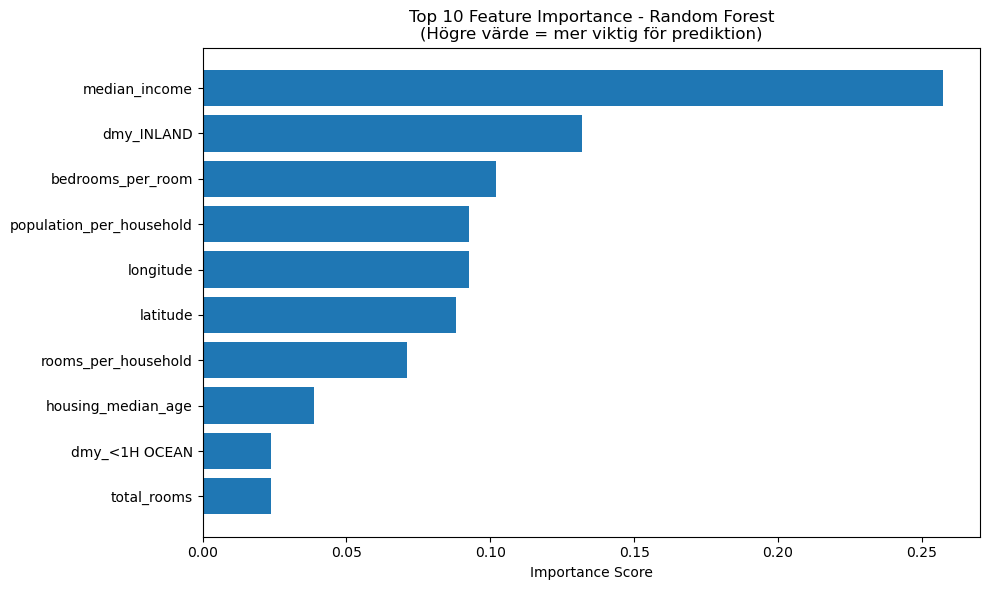

<Figure size 640x480 with 0 Axes>


=== SLUTLIG TESTNING PÅ HELT OSEDD DATA ===
Tränar slutlig modell: RF med RFE
Tränar på hela träningsdatasetet för maximal prestanda...

🎯 SLUTLIGT TESTRESULTAT:
RMSE på testdata: $47,634.24
MAE på testdata:  $31,050.21
Medelpris:        $206,754.57
RMSE som % av medelpris: 23.0%
MAE som % av medelpris:  15.0%

Tolkning: Modellen är i genomsnitt fel med $31,050 (MAE)
och har större fel på $47,634 (RMSE) på grund av outliers.


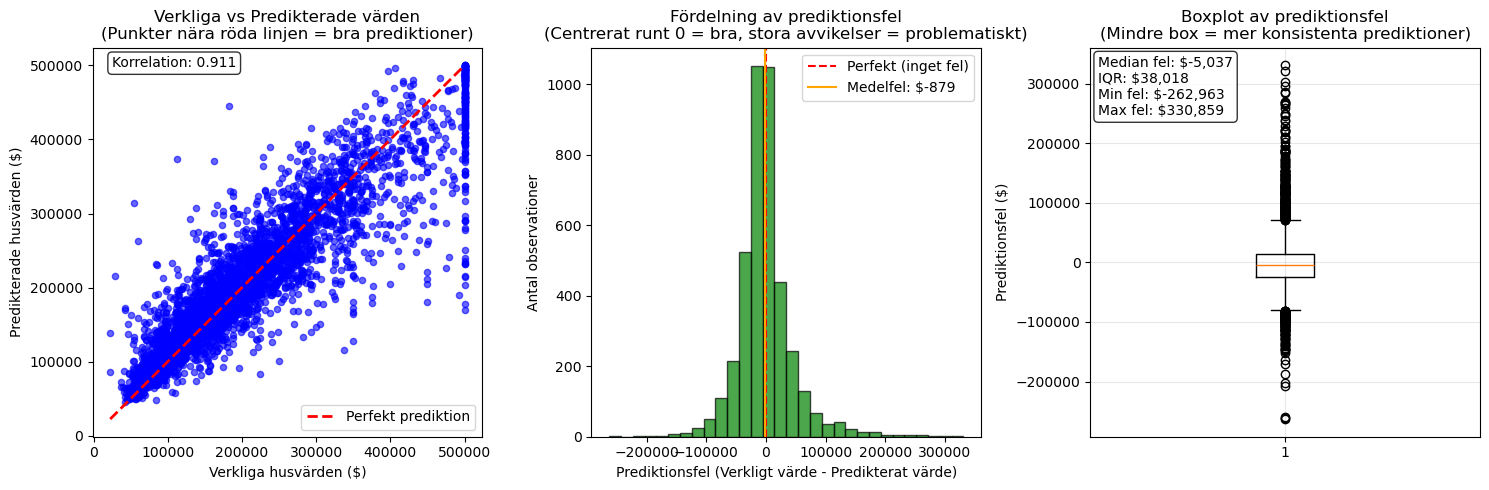


📊 ANALYS AV PREDIKTIONSFEL:
Antal stora fel (outliers): 223 av 4083 (5.5%)
Medianfel: $-5,037 (närmare 0 = bättre)
Standardavvikelse för fel: $47,626 (lägre = mer konsistent)
Sparade även RFE selector som 'rfe_selector.pkl'
✅ Slutlig modell sparad som 'improved_rf_model.pkl'
För att ladda modellen senare: modell = joblib.load('improved_rf_model.pkl')

=== DEMONSTRATION: PREDIKTERA NYA HUSPRISER ===
Nya distrikt att prediktera:
 longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  dmy_<1H OCEAN  dmy_INLAND  dmy_NEAR BAY  dmy_NEAR OCEAN
   -118.30      34.2                35.0        880.0           200.0       500.0       220.0            4.2              0           1             0               0
   -117.85      33.9                20.0       1200.0           300.0       750.0       280.0            5.1              1           0             0               0

Applicerar samma feature engineering och preprocessing...
Använde RFE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import StandardScaler
import joblib
import time

# Ladda in California housing dataset
housing_original = pd.read_csv("housing.csv")

# Ta bort öar från datasetet eftersom de har för få observationer och kan skapa brus
# ISLAND-kategorin har mycket få datapunkter och kan förvirra modellen
housing = housing_original[housing_original['ocean_proximity'] != 'ISLAND']


# pd.get_dummies() skapar binära (0/1) kolumner för varje kategori
# Detta behövs eftersom machine learning-algoritmer inte kan hantera text direkt
# prefix='dmy' lägger till prefixet 'dmy_' för att göra kolumnnamnen tydligare
housing = pd.get_dummies(housing, columns=['ocean_proximity'], dtype=int, prefix='dmy')


# FEATURE ENGINEERING - SKAPAR NYA VARIABLER FRÅN BEFINTLIGA
def create_features(df):
    """
    Skapar nya features (variabler) från befintliga data.
    
    VARFÖR EN SEPARAT FUNKTION?
    - Gör koden återanvändbar och lättare att underhålla
    - Vi kan applicera samma transformationer på tränings-, validerings- och testdata
    - Undviker kod-upprepning och minskar risk för fel
    """
    df = df.copy()  # Skapar en kopia för att inte ändra originaldata
    
    # Rum per hushåll - indikerar hur rymligt boendet är
    # Större värde = mer utrymme per familj = högre pris
    df['rooms_per_household'] = df['total_rooms'] / df['households']
    
    # Andel sovrum av totala rum - indikerar hustyp och layout
    df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
    
    # Personer per hushåll - befolkningstäthet på hushållsnivå
    df['population_per_household'] = df['population'] / df['households']
    
    # Kategorisera inkomst i intervall med pd.cut()
    # pd.cut() delar upp kontinuerlig data i diskreta "hinkar" eller kategorier
    df['income_cat'] = pd.cut(df['median_income'],
                             bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                             labels=[1, 2, 3, 4, 5])
    
    # np.inf representerar oändlighet (för att fånga alla värden över 40)
    df['age_cat'] = pd.cut(df['housing_median_age'],
                          bins=[0, 10, 20, 30, 40, np.inf],
                          labels=[1, 2, 3, 4, 5])
    
    return df

# Applicera feature engineering på hela datasetet
housing_enhanced = create_features(housing)

# FÖRSTA UPPDELNINGEN: 80% träning + validering, 20% test
# train_test_split() delar slumpmässigt upp data i två delar
# test_size=0.2 betyder att 20% går till test
# random_state=40 säkerställer reproducerbarhet (samma resultat varje gång)
train_full, test = train_test_split(housing_enhanced, test_size=0.2, random_state=40)

# ANDRA UPPDELNINGEN: Dela train_full i träning (60%) och validering (20%)
# test_size=0.25 av train_full (80%) ger oss 20% av originaldata för validering
# Nu har vi: 60% träning, 20% validering, 20% test
train, val = train_test_split(train_full, test_size=0.25, random_state=36)

print(f"Träningsdata: {train.shape[0]} observationer")
print(f"Valideringsdata: {val.shape[0]} observationer") 
print(f"Testdata: {test.shape[0]} observationer")

# Rensa bort rader med saknade värden
# dropna() tar bort alla rader som har minst ett NaN-värde
train = train.dropna()
val = val.dropna()
test = test.dropna()

print(f"Efter borttagning av NaN - Träning: {train.shape[0]}, Validering: {val.shape[0]}, Test: {test.shape[0]}")
# Separera features (X) från målvariabel (y)
# X = alla kolumner utom den vi vill prediktera
# y = målvariabeln (median_house_value)
# select_dtypes(include=[np.number]) väljer endast numeriska kolumner

X_train_full = train_full.drop(columns=['median_house_value']).select_dtypes(include=[np.number])
y_train_full = train_full['median_house_value']

X_train = train.drop(columns=['median_house_value']).select_dtypes(include=[np.number])
y_train = train['median_house_value']

X_val = val.drop(columns=['median_house_value']).select_dtypes(include=[np.number])
y_val = val['median_house_value']

X_test = test.drop(columns=['median_house_value']).select_dtypes(include=[np.number])
y_test = test['median_house_value']

print(f"Antal features efter feature engineering: {X_train.shape[1]}")
print(f"Nya features inkluderar: {X_train.columns.tolist()}")



print("\n=== VARIABELSELEKTION ===")

# METOD 1: UNIVARIAT FEATURE SELECTION
# SelectKBest väljer de K bästa features baserat på en statistisk test
# f_regression testar linjär relation mellan varje feature och målvariabeln
# k=12 betyder att vi väljer de 12 bästa features
selector_univariate = SelectKBest(score_func=f_regression, k=12)

# fit_transform() gör två saker:
# 1. fit(): Lär sig vilka features som är bäst (tränar selektorn)
# 2. transform(): Applicerar selektionen och returnerar bara de utvalda features
X_train_selected = selector_univariate.fit_transform(X_train, y_train)

# transform() applicerar samma selektion på valideringsdata
# VIKTIGT: Vi använder samma selektor som tränats på träningsdata
# för att undvika data leakage (läcka information från validering till träning)
X_val_selected = selector_univariate.transform(X_val)

# get_support() returnerar en boolean-mask som visar vilka features som valdes
selected_features = X_train.columns[selector_univariate.get_support()]
print(f"Utvalda features (univariat): {selected_features.tolist()}")

# METOD 2: RECURSIVE FEATURE ELIMINATION (RFE)
# RFE tränar modellen upprepade gånger och tar bort de minst viktiga features
# Mer sofistikerat än univariat selection eftersom den tar hänsyn till feature-interaktioner
print("\nKör Recursive Feature Elimination...")

# Snabb modell för selektion
rf_selector = RandomForestRegressor(n_estimators=50, random_state=42)
# Välj 10 bästa features
rfe_selector = RFE(estimator=rf_selector, n_features_to_select=10)

# Samma fit_transform mönster som ovan
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_val_rfe = rfe_selector.transform(X_val)

rfe_features = X_train.columns[rfe_selector.get_support()]
print(f"Utvalda features (RFE): {rfe_features.tolist()}")



print("\n=== HYPERPARAMETEROPTIMERING ===")
# Definiera ett rutnät av hyperparametrar att testa
# Hyperparametrar = inställningar som kontrollerar hur algoritmen beter sig
# Dessa kan INTE läras från data utan måste ställas in manuellt

extended_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.8],
    'bootstrap': [True, False]
}

# RandomizedSearchCV vs GridSearchCV:
# - GridSearchCV testar ALLA kombinationer = långsamt men komplett
# - RandomizedSearchCV testar slumpmässiga kombinationer = snabbare, fortfarande bra resultat
# n_iter=50 betyder att vi testar 50 slumpmässiga kombinationer

print("Kör RandomizedSearchCV för att hitta bästa hyperparametrar...")
print("Detta kan ta några minuter eftersom vi testar många kombinationer...")
start_time = time.time()

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
rf_random = RandomForestRegressor(random_state=42, n_jobs=-1)  # n_jobs=-1 använder alla CPU-kärnor
random_search = RandomizedSearchCV(
    rf_random,                                   # Modellen att optimera
    extended_param_grid,                         # Hyperparametrar att testa  
    n_iter=50,                                   # Antal slumpmässiga kombinationer
    scoring='neg_root_mean_squared_error',       # Mätvärde att optimera (negativt RMSE)
    cv=5,                                        # 5-fold korsvalidering
    random_state=42,                             # För reproducerbarhet
    n_jobs=-1                                    # Parallellisering
)

# Träna och testa alla hyperparameterkombinationer
random_search.fit(X_train, y_train)
end_time = time.time()

print(f"RandomizedSearchCV tog {end_time - start_time:.2f} sekunder")
print(f"Bästa hyperparametrar: {random_search.best_params_}")
print(f"Bäst CV-score (RMSE): {-random_search.best_score_:.2f}")
print("(Lägre RMSE = bättre modell)")



print("\n=== MODELLUTVÄRDERING ===")
models_results = {}  # Dictionary för att spara resultat från alla modeller

# MODELL 1: ORIGINAL RANDOM FOREST (från ursprunglig kod)
# Skapar en Random Forest med samma inställningar som i originalexemplet
# Detta ger oss en baseline att jämföra förbättringarna mot
rf_original = RandomForestRegressor(max_depth=50, n_estimators=10, random_state=42)
rf_original.fit(X_train, y_train)                    # Träna modellen
pred_original = rf_original.predict(X_val)           # Gör prediktioner på valideringsdata
rmse_original = root_mean_squared_error(y_val, pred_original)  # Beräkna RMSE
models_results['Original RF'] = rmse_original

# MODELL 2: OPTIMERAD RANDOM FOREST (från RandomizedSearch)
# Använder de bästa hyperparametrarna vi hittade
# best_estimator_ ger oss den färdigtränande modellen med bästa parametrarna
best_rf = random_search.best_estimator_
pred_best = best_rf.predict(X_val)
rmse_best = root_mean_squared_error(y_val, pred_best)
models_results['Optimerad RF (alla features)'] = rmse_best

# MODELL 3: RANDOM FOREST MED UNIVARIAT FEATURE SELECTION
# Kombinerar hyperparameteroptimering med feature selection
# Tränar en ny modell på endast de utvalda features
rf_univariate = RandomForestRegressor(**random_search.best_params_, random_state=42)
rf_univariate.fit(X_train_selected, y_train)
pred_univariate = rf_univariate.predict(X_val_selected)
rmse_univariate = root_mean_squared_error(y_val, pred_univariate)
models_results['RF med univariat selektion'] = rmse_univariate

# MODELL 4: RANDOM FOREST MED RFE FEATURE SELECTION  
# Liknande som ovan men med RFE-selekterade features
rf_rfe = RandomForestRegressor(**random_search.best_params_, random_state=42)
rf_rfe.fit(X_train_rfe, y_train)
pred_rfe = rf_rfe.predict(X_val_rfe)
rmse_rfe = root_mean_squared_error(y_val, pred_rfe)
models_results['RF med RFE'] = rmse_rfe

# VISA RESULTAT OCH JÄMFÖR PRESTANDA
print("\nRMSE-resultat på valideringsdata:")
print("="*50)
for model_name, rmse in models_results.items():
    # Beräkna procentuell förbättring jämfört med originalmodellen
    improvement = ((rmse_original - rmse) / rmse_original) * 100
    print(f"{model_name}: ${rmse:,.2f} (förbättring: {improvement:+.1f}%)")

# Hitta bästa modellen (lägst RMSE)
best_model_name = min(models_results, key=models_results.get)
best_rmse = models_results[best_model_name]
print(f"\n🏆 BÄSTA MODELL: {best_model_name}")
print(f"   RMSE: ${best_rmse:,.2f}")
print(f"   Förbättring mot original: {((rmse_original - best_rmse) / rmse_original) * 100:.1f}%")


print("\n=== FEATURE IMPORTANCE ANALYS ===")
# Random Forest kan automatiskt beräkna hur viktig varje feature är
# feature_importances_ ger ett värde mellan 0-1 för varje feature
# Högre värde = mer viktig för prediktionen

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

print("🔍 Top 10 viktigaste features för att prediktera huspriser:")
print("="*60)
for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['feature']:<25} {row['importance']:.4f}")

# Visualisera feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importance - Random Forest\n(Högre värde = mer viktig för prediktion)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()


print("\n=== SLUTLIG TESTNING PÅ HELT OSEDD DATA ===")

# Nu tränar vi den bästa modellen på ALL träningsdata (train_full)
# och testar på testdata som modellen ALDRIG sett tidigare
# Detta ger oss den rättvisaste utvärderingen av modellens verkliga prestanda


print(f"Tränar slutlig modell: {best_model_name}")
print("Tränar på hela träningsdatasetet för maximal prestanda...")


if best_model_name == 'RF med univariat selektion':
    X_train_full_processed = selector_univariate.fit_transform(
        train_full.drop(columns=['median_house_value']).select_dtypes(include=[np.number]), 
        train_full['median_house_value']
    )
    X_test_processed = selector_univariate.transform(X_test)
    final_model = RandomForestRegressor(**random_search.best_params_, random_state=42)
    
elif best_model_name == 'RF med RFE':
    # Samma logik men för RFE
    X_train_full_processed = rfe_selector.fit_transform(
        train_full.drop(columns=['median_house_value']).select_dtypes(include=[np.number]), 
        train_full['median_house_value']
    )
    X_test_processed = rfe_selector.transform(X_test)
    final_model = RandomForestRegressor(**random_search.best_params_, random_state=42)
    
else:
    # Använd alla features utan selektion
    X_train_full_processed = train_full.drop(columns=['median_house_value']).select_dtypes(include=[np.number])
    X_test_processed = X_test
    final_model = best_rf

# Träna slutlig modell på all träningsdata
final_model.fit(X_train_full_processed, y_train_full)

# Testa på helt osedd testdata
test_predictions = final_model.predict(X_test_processed)

# Beräkna flera utvärderingsmätvärden
test_rmse = root_mean_squared_error(y_test, test_predictions)       # Root Mean Square Error
test_mae = mean_absolute_error(y_test, test_predictions)            # Mean Absolute Error
mean_price = np.mean(y_test)                                       # Medelpris för kontext


print(f"\n🎯 SLUTLIGT TESTRESULTAT:")
print(f"="*50)
print(f"RMSE på testdata: ${test_rmse:,.2f}")
print(f"MAE på testdata:  ${test_mae:,.2f}")  
print(f"Medelpris:        ${mean_price:,.2f}")
print(f"RMSE som % av medelpris: {(test_rmse/mean_price)*100:.1f}%")
print(f"MAE som % av medelpris:  {(test_mae/mean_price)*100:.1f}%")
print(f"\nTolkning: Modellen är i genomsnitt fel med ${test_mae:,.0f} (MAE)")
print(f"och har större fel på ${test_rmse:,.0f} (RMSE) på grund av outliers.")



# Skapa omfattande visualiseringar för att förstå modellens prestanda
plt.figure(figsize=(15, 5))

# GRAF 1: VERKLIGA VS PREDIKTERADE VÄRDEN
plt.subplot(1, 3, 1)
plt.scatter(y_test, test_predictions, alpha=0.6, color='blue', s=20)
# Rita en perfekt linje (där prediktioner = verkliga värden)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfekt prediktion')
plt.xlabel('Verkliga husvärden ($)')
plt.ylabel('Predikterade husvärden ($)')
plt.title('Verkliga vs Predikterade värden\n(Punkter nära röda linjen = bra prediktioner)')
plt.legend()
# Lägg till korrelationskoefficient som mäter hur väl prediktioner matchar verkligheten
correlation = np.corrcoef(y_test, test_predictions)[0, 1]
plt.text(0.05, 0.95, f'Korrelation: {correlation:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# GRAF 2: FÖRDELNING AV PREDIKTIONSFEL
plt.subplot(1, 3, 2)
errors = y_test - test_predictions  # Positivt fel = underprediktering, negativt = överprediktering
plt.hist(errors, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label='Perfekt (inget fel)')
plt.axvline(x=np.mean(errors), color='orange', linestyle='-', label=f'Medelfel: ${np.mean(errors):,.0f}')
plt.xlabel('Prediktionsfel (Verkligt värde - Predikterat värde)')
plt.ylabel('Antal observationer')
plt.title('Fördelning av prediktionsfel\n(Centrerat runt 0 = bra, stora avvikelser = problematiskt)')
plt.legend()

# GRAF 3: BOXPLOT AV PREDIKTIONSFEL
plt.subplot(1, 3, 3)
plt.boxplot(errors, vert=True)
plt.ylabel('Prediktionsfel ($)')
plt.title('Boxplot av prediktionsfel\n(Mindre box = mer konsistenta prediktioner)')
plt.grid(True, alpha=0.3)

# IQR: Vad är IQR?
# IQR är ett mått på spridning i data som visar hur utspridda värdena är i mitten av fördelningen.
# Beräkning:
# Q1 (första kvartilen) = värdet där 25% av data ligger under
# Q3 (tredje kvartilen) = värdet där 75% av data ligger under
# IQR = Q3 - Q1

# Praktiskt exempel:
# Om vi har huspriser: [100k, 150k, 200k, 250k, 300k, 350k, 400k, 450k, 500k]
# Q1 = 200k (25% av värdena är under detta)
# Q3 = 400k (75% av värdena är under detta)
# IQR = 400k - 200k = 200k
# IQR fokuserar på "mitten" av data och ignorerar extremvärdena

# Tolkning i boxplot:
# IQR = höjden på "boxen" i en boxplot
# Mindre box = mer konsistenta värden
# Större box = mer variation

# Prediktionsfel:
# Litet IQR → Modellen gör liknande fel på de flesta hus
# Stort IQR → Modellen är mycket mer osäker på vissa hus än andra

q25, q75 = np.percentile(errors, [25, 75])
plt.text(0.02, 0.98, 
         f'Median fel: ${np.median(errors):,.0f}\n'
         f'IQR: ${q75-q25:,.0f}\n'
         f'Min fel: ${np.min(errors):,.0f}\n'
         f'Max fel: ${np.max(errors):,.0f}',
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()



# Extra insikter om felen
print(f"\n📊 ANALYS AV PREDIKTIONSFEL:")
print(f"="*40)
outliers = np.abs(errors) > 2 * np.std(errors)  # Definiera outliers som 2 standardavvikelser
print(f"Antal stora fel (outliers): {np.sum(outliers)} av {len(errors)} ({np.sum(outliers)/len(errors)*100:.1f}%)")
print(f"Medianfel: ${np.median(errors):,.0f} (närmare 0 = bättre)")
print(f"Standardavvikelse för fel: ${np.std(errors):,.0f} (lägre = mer konsistent)")



joblib.dump(final_model, 'improved_rf_model.pkl')
if best_model_name == 'RF med univariat selektion':
    joblib.dump(selector_univariate, 'feature_selector.pkl')
    print("Sparade även feature selector som 'feature_selector.pkl'")
elif best_model_name == 'RF med RFE':
    joblib.dump(rfe_selector, 'rfe_selector.pkl') 
    print("Sparade även RFE selector som 'rfe_selector.pkl'")

print(f"✅ Slutlig modell sparad som 'improved_rf_model.pkl'")
print(f"För att ladda modellen senare: modell = joblib.load('improved_rf_model.pkl')")


print("\n=== DEMONSTRATION: PREDIKTERA NYA HUSPRISER ===")
new_districts = pd.DataFrame({
    'longitude': [-118.30, -117.85],
    'latitude': [34.20, 33.90],
    'housing_median_age': [35.0, 20.0],
    'total_rooms': [880.0, 1200.0],
    'total_bedrooms': [200.0, 300.0],
    'population': [500.0, 750.0],
    'households': [220.0, 280.0],
    'median_income': [4.2, 5.1],
    'dmy_<1H OCEAN': [0, 1],
    'dmy_INLAND': [1, 0],
    'dmy_NEAR BAY': [0, 0],
    'dmy_NEAR OCEAN': [0, 0]
})

print("Nya distrikt att prediktera:")
print(new_districts.to_string(index=False))

# VIKTIGT: Applicera samma preprocessing som användes för träning
print("\nApplicerar samma feature engineering och preprocessing...")

# 1. Skapa samma engineered features
new_districts_enhanced = create_features(new_districts)

# 2. Välj endast numeriska kolumner (samma som träningsdata)
new_districts_numeric = new_districts_enhanced.select_dtypes(include=[np.number])

# 3. Applicera samma feature selection som användes för bästa modellen
if best_model_name == 'RF med univariat selektion':
    new_districts_processed = selector_univariate.transform(new_districts_numeric)
    print("Använde univariat feature selection för konsistens")
elif best_model_name == 'RF med RFE':
    new_districts_processed = rfe_selector.transform(new_districts_numeric)
    print("Använde RFE feature selection för konsistens")
else:
    new_districts_processed = new_districts_numeric
    print("Använde alla features")

# 4. Gör prediktioner
predictions = final_model.predict(new_districts_processed)

print(f"\n🏠 RESULTAT AV HUSPRISPREDIKTION:")
print(f"="*50)
for i, (value, district_info) in enumerate(zip(predictions, new_districts.itertuples()), start=1):
    income_k = district_info.median_income * 10  # Konvertera till tusentals dollar
    location = "nära hav" if district_info._9 else "inlands"  # _9 är <1H OCEAN kolumnen
    
    print(f"Distrikt {i}: ${value:,.2f}")
    print(f"  📍 Plats: {location} ({district_info.latitude:.2f}°N, {district_info.longitude:.2f}°W)")
    print(f"  💰 Medianinkomst: ${income_k:.0f}k/år")
    print(f"  🏘️ Husålder: {district_info.housing_median_age:.0f} år")
    print(f"  👥 Hushåll: {district_info.households:.0f}")
    print()

print("💡 TIPS FÖR ANVÄNDNING:")
print("- Modellen är tränad på Kaliforniens data från en specifik tidsperiod")
print("- Bäst prestanda förväntas för liknande geografiska områden och marknadsförhållanden")  
print("- Alltid validera prediktioner mot aktuella marknadspriser")
print("- Använd modellen som ett verktyg bland flera för prisvärdering")

# DEL 3

### 3.1. Vad kännetecknar klassificeringsproblem? Ge några exempel på tillämpningsområden.

Ett regressionsproblem handlar om att förutsäga ett kontinuerligt värde (till skillnad från klassificering, som förutsäger kategorier).

Exempel på tillämpningar:
- Förutsäga bostadspriser utifrån storlek, läge, antal rum m.m.
- Prognostisera aktiekurser eller ekonomiska nyckeltal.
- Förutsäga temperatur eller väderutveckling.
- Förutsäga patientens blodtryck baserat på hälsodata.

### 3.2.Förklara utvärderingsmåtten RMSE, MSE och MAE.

- MSE (Mean Squared Error): Genomsnittet av de kvadrerade felen. Straffar stora fel hårdare.
- RMSE (Root Mean Squared Error): Kvadratroten ur MSE. Har samma enhet som den förutsagda variabeln och är därför mer tolkbar.
- MAE (Mean Absolute Error): Genomsnittet av de absoluta felen. Mer robust mot extremvärden eftersom fel inte kvadreras.

### 3.3. Om vi ska rangordna olika modeller, spelar det någon roll om RMSE eller MSE används? Varför?

- Nej, det spelar ingen roll för rangordningen eftersom RMSE = √MSE. Kvadratroten är en monotont växande funktion, vilket innebär att om modell A har lägre MSE än modell B, så kommer den också ha lägre RMSE.
- Däremot kan valet spela roll om man vill tolka resultaten i samma enhet som målet (då är RMSE bättre).

### 3.4. Förklara mycket översiktligt vad gradient descent är.

- Gradient descent är en optimeringsmetod som används för att hitta den bästa modellen (minimera fel).
- Idén: Börja med en slumpmässig lösning -> beräkna felet -> räkna ut gradienten (riktningen mot större fel) -> ta ett steg i motsatt riktning -> upprepa tills vi når en punkt där felet är minimalt.
- Det är som att gå nerför en kulle tills man når dalens botten.

### 3.5. Vad är the bias-variance trade-off? Varför är mer komplexa modeller inte alltid bättre?

- Bias-variance trade-off beskriver avvägningen mellan:
- - Bias (förskjutning): Fel som uppstår när modellen är för enkel och inte fångar komplexiteten (underfitting).
- - Variance (varians): Fel som uppstår när modellen är för komplex och anpassar sig för mycket till träningsdata (överfitting).
- Mer komplexa modeller är inte alltid bättre eftersom de kan få låg bias men mycket hög varians, vilket gör att de presterar dåligt på ny (test) data. Den bästa modellen ligger någonstans mitt emellan.

### 3.6. Några vanligt förekommande modeller för regressionsproblem är enligt nedan. Förklara översiktligt hur respektive modell fungerar. Läs även igenom respektive modells dokumentation, notera att du inte behöver förstå alla detaljer från dokumentationen men det är bra att ha läst igenom den.

a) Linjär regression
- Grundidén: Anpassa en rak linje (eller hyperplan i flera dimensioner) som bäst beskriver sambandet mellan oberoende variabler (X) och den beroende variabeln (y).
- Målet är att minimera summan av kvadrerade fel (least squares).
- Enkel, tolkbar men fungerar dåligt om sambandet är icke-linjärt.

b) Ridge regression
- En utvidgning av linjär regression där man lägger till en straffterm (L2-regularisering) på koefficienterna.
- Hindrar koefficienterna från att bli alltför stora → minskar risken för överfitting.
- Viktigt när man har många starkt korrelerade variabler.

c) Lasso regression
- Liknar Ridge men använder L1-regularisering.
- Straffar absolutbeloppen av koefficienterna.
- Leder ofta till att vissa koefficienter blir exakt noll → fungerar även som en metod för feature selection.

d) Elastic Net
- En kombination av Ridge (L2) och Lasso (L1).
- Ger en balans: kan både hantera multikollinearitet (som Ridge) och göra variabelurval (som Lasso).
- Två parametrar styr blandningen mellan L1 och L2.

e) Support Vector Machines (SVR)
- Idén: Hitta en funktion som ligger inom en ”marginal” (epsilon-tub) kring datapunkterna.
- Punkter innanför tuben straffas inte, men punkter utanför straffas.
- Kan använda kärntrick (kernel) för att modellera icke-linjära samband.
- Bra för komplexa relationer, men kan vara långsamma på stora dataset.

f) Beslutsträd (Decision Tree Regressor)
- Delar upp data i ”grenar” baserat på regler (”är x < 5?”).
- Skapar en trädstruktur där löven representerar förutsägelser (medelvärde av observationerna i lövet).
- Lätt att tolka, men tenderar att överfitta om trädet blir för djupt.

g) Ensemble learning
- Samlar flera modeller för att förbättra resultatet. Några exempel:
- Voting Regressor: Kombinerar flera olika modeller och tar ett vägt genomsnitt av deras förutsägelser.
- Bagging Regressor: Tränar många ”svaga” modeller (ofta beslutsträd) på olika slumpmässiga delmängder av datan -> resultaten kombineras (ofta med medelvärde).
- Syftet är att öka stabilitet och minska varians.

h) Random Forest
- En typ av bagging-metod som bygger många beslutsträd.
- Varje träd tränas på ett slumpmässigt urval av både observationer och variabler.
- Förutsägelsen är medelvärdet av alla träds förutsägelser.
- Mindre risk för överfitting än ett enskilt beslutsträd och ofta mycket kraftfull.

### 3.7. Vad menas med white box-modeller och black box-modeller?

White box = tolkningsbarhet, Black box = hög komplexitet men låg insyn.

### 3.8. Vad är skillnaden mellan bagging och pasting?

Bagging (Bootstrap Aggregating)
- Varje modell tränas på ett slumpmässigt urval med återläggning (bootstrap sample).
- Det betyder att samma datapunkt kan förekomma flera gånger i ett träningsset.
- Exempel: Random Forest bygger på bagging.

Pasting
- Liknar bagging, men här görs urvalet utan återläggning.
- Varje träningsset blir därför en unik delmängd av originaldatan.

Skillnaden:
- Bagging = sampling med återläggning.
- Pasting = sampling utan återläggning.

### 3.9. Förklara hur man kan tolka figur 3.1 (s. 113).


Figuren visar en enkel linjär regressionsmodell där:
- x = ålder (förklarande variabel)
- y = inkomst (responsvariabel)
- De svarta punkterna är observerade data (𝑦𝑖).
- Den blå linjen är den predikterade linjen:y^​=θ^0​+θ^1​x
- 𝜃^ är interceptet (där linjen skär y-axeln).
- θ^1 är lutningen (hur inkomsten förändras per ökad ålder).
- De röda vertikala linjerna är residualer: skillnaden mellan observerat värde yi och predikterat värde 𝑦^𝑖.

Kort Förklaring = Figuren visar hur modellen försöker hitta en rak linje som bäst förklarar sambandet mellan ålder och inkomst.

### 3.10. Förklara hur man kan tolka figur 3.13 (s. 140). Hur hänger den ihop med figur 3.14 (s. 141)?

Figur 3.13 (träddiagram):
- Visualiserar ett beslutsträd för regression.
- Vid varje nod delas datan upp utifrån ett villkor, t.ex.: "Är X2≤0.438?"
- Varje delning görs för att minimera felet (här anges t.ex. squared_error).
- Löven (nedersta rutorna) visar:
- - Antal datapunkter (samples) i lövet.
- - Medelvärdet (value) som används som förutsägelse för de datapunkterna.

Figur 3.14 (färgkartan):
- Visar samma beslutsträd projicerat på dataplanet (X1, X2).
- De olika färgerna representerar de förutsagda värdena i olika regioner.
- Varje rektangulärt område i figuren motsvarar ett blad i trädet från figur 3.13.
- De horisontella och vertikala linjerna i figuren representerar gränserna (splits) från trädet.

Koppling mellan 3.13 - 3.14 =
- 3.13 = logiken bakom uppdelningen (regelverket).
- 3.14 = hur dessa regler ”översätts” till olika områden i datarummet.

### 3.11.  Gå igenom samtliga kodexempel i kapitlet och skriv gärna av koden manuellt. Det är även bra att experimentera genom att ändra vissa delar av koden och läsa dokumentationen.

In [75]:
# Sida 110: 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples=5000, n_features=3, noise=5,
random_state=42)
print(X[:4, :])
print(y[:4])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[ 0.67796997 -1.28472777 -0.33102433]
 [ 1.03138053  0.3881858  -0.97027133]
 [-1.21689671  1.36337651 -0.60515624]
 [-0.54429615 -0.50442268 -1.5198928 ]]
[  -1.88062329  -46.40116933  -95.83251096 -155.05295711]


Intercept: 22.179402677651904
Slope: [0.46632338]
Predicting a new observation with model [23.11204943]
Predicting a new observation manually [[23.11204943]]


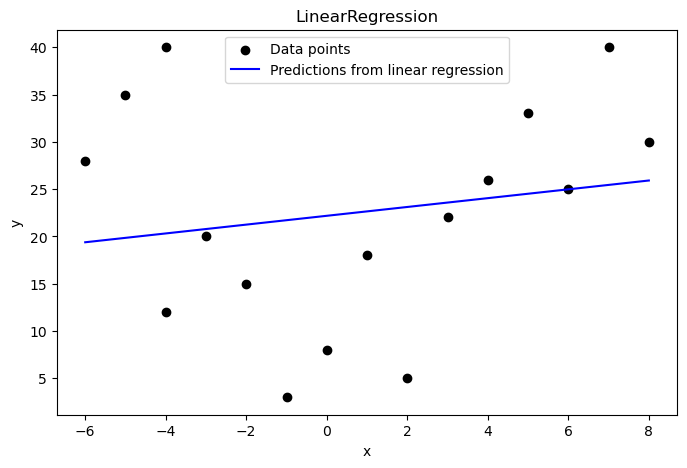

In [ ]:
# Sida 112:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#Data
x = np.array([6,7, 8,-4,-6,-5,-4,-3,-2,-1, 0, 1, 2, 3, 4,
5]).reshape(-1, 1)
y = np.array([25, 40,30, 40,28, 35, 12, 20, 15, 3, 8,18, 5,
22, 26, 33])
#Fit model
lin_reg = LinearRegression()
lin_reg.fit(x,y)

# Sida 114: 
#Print parameters
print("Intercept:",lin_reg.intercept_)
print("Slope:",lin_reg.coef_)
#Predictinganewobservation
x_new= np.array(2).reshape(-1, 1)
print("Predicting a new observation with model",
lin_reg.predict(x_new))
print("Predicting a new observation manually", lin_reg.intercept_ + lin_reg.coef_*x_new)
#Createaplot
x_values= np.linspace(x.min(),x.max(), 100).reshape(-1,1)
y_pred =lin_reg.predict(x_values)
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y, color='black', label='Data points')
ax.plot(x_values,y_pred,color='blue',label='Predictions from linear regression')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("LinearRegression")
ax.legend()

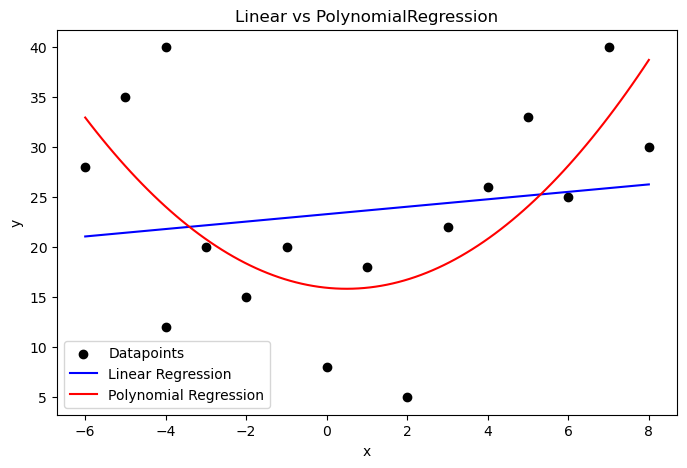

In [77]:
# Sida 116:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#Data
x = np.array([6,7, 8,-4,-6,-5,-4,-3,-2,-1, 0, 1, 2, 3, 4,5]).reshape(-1, 1)
y = np.array([25, 40,30, 40,28, 35, 12, 20, 15, 20, 8, 18, 5, 22, 26, 33])
#Linearregression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
#Polynomialregression
poly = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly.fit_transform(x)
poly_reg = LinearRegression()
poly_reg.fit(x_poly,y)
#Createaplot
x_values = np.linspace(x.min(),x.max(), 100).reshape(-1,1)
y_pred_linear = lin_reg.predict(x_values)
x_values_poly = poly.transform(x_values)
y_pred_poly = poly_reg.predict(x_values_poly)
fig,ax = plt.subplots(figsize=(8,5))
ax.scatter(x,y,color='black',label='Datapoints')
ax.plot(x_values,y_pred_linear,color='blue',label='Linear Regression')
ax.plot(x_values,y_pred_poly,color='red',label='Polynomial Regression')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Linear vs PolynomialRegression")
ax.legend()

In [80]:
# Sida 119:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
lin_reg =LinearRegression()
poly_reg_pipeline = Pipeline([('poly',PolynomialFeatures(degree=2,include_bias=False)), ('polyreg',LinearRegression())])
lin_reg.fit(X_train,y_train)
poly_reg_pipeline.fit(X_train,y_train)
y_pred_lin_reg= lin_reg.predict(X_test)
y_pred_poly_reg = poly_reg_pipeline.predict(X_test)
RMSE_lin_reg =root_mean_squared_error(y_test,y_pred_lin_reg)
RMSE_poly_reg= root_mean_squared_error(y_test,y_pred_poly_reg)
print("RMSE for LinearRegression:",RMSE_lin_reg)

# Sida 121:
print("RMSE for Polynomial Regression:", RMSE_poly_reg)

if RMSE_lin_reg < RMSE_poly_reg:
    print("The linear regression model has lower RMSE and is hence better.")
elif RMSE_lin_reg == RMSE_poly_reg:
    print("Both models have the same RMSE meaning they are equally good.")
else: 
    print("The polynomial regression model has lower RMSE and is hence better.")

RMSE for LinearRegression: 5.09730997273096
RMSE for Polynomial Regression: 5.101743953679335
The linear regression model has lower RMSE and is hence better.


In [83]:
# Sida 131:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
hyperparams = {'alpha': [0.1, 1, 10]}
ridge = Ridge()
ridge_gs = GridSearchCV(estimator=ridge, param_grid=hyperparams,
scoring='neg_mean_squared_error', cv= 5)
ridge_gs.fit(X_train, y_train)
print("Optimized value for alpha:", ridge_gs.best_estimator_)
print("Coefficients for ridge regression:", np.round(ridge_gs.best_estimator_.coef_, 5))

# Sida 132:
print("Coefficients for linear regression:", np.round(lin_reg.coef_, 5))
y_pred = ridge_gs.predict(X_test)
rmse_ridge = root_mean_squared_error(y_test, y_pred)
print("RMSE for Ridge Regression:", np.round(rmse_ridge, 4))
print("RMSE for Linear Regression:", np.round(RMSE_lin_reg, 4))

# Sida 134:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=9)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
RMSE_lasso = root_mean_squared_error(y_test, y_pred_lasso)
print("Coefficients for lasso regression:",
np.round((lasso_reg.coef_), 2))
print("RMSE for lasso regression:", np.round(RMSE_lasso))

Optimized value for alpha: Ridge(alpha=0.1)
Coefficients for ridge regression: [38.99838  1.29336 89.84231]
Coefficients for linear regression: [38.99942  1.29342 89.84458]
RMSE for Ridge Regression: 5.0971
RMSE for Linear Regression: 5.0973
Coefficients for lasso regression: [29.78  0.   80.6 ]
RMSE for lasso regression: 13.0


In [85]:
# Sida 136:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
hyperparams = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}
elastic_net_gs = GridSearchCV(estimator=elastic_net,
param_grid=hyperparams,
scoring='neg_mean_squared_error', cv=5)
elastic_net_gs.fit(X_train, y_train)
print("Optimized values from grid search:",
elastic_net_gs.best_estimator_)
print("Coefficients for elastic net:",
np.round(elastic_net_gs.best_estimator_.coef_, 5))
y_pred = elastic_net_gs.predict(X_test)
rmse_elastic_net = root_mean_squared_error(y_test, y_pred)
print("RMSE for Elastic Net:", np.round(rmse_elastic_net, 4))

# Sida 138:
from sklearn.svm import LinearSVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', LinearSVR())]
)
hyperparams = {'svr__epsilon': [0.01, 0.1, 1.0]}
svr_grid_search = GridSearchCV(estimator=svr_pipeline,
param_grid=hyperparams, scoring='neg_mean_squared_error')
svr_grid_search.fit(X_train, y_train)
y_pred = svr_grid_search.predict(X_test)
rmse_svr = root_mean_squared_error(y_test, y_pred)
print("Optimized SVR pipeline:", svr_grid_search.best_estimator_)
print("Root Mean Squared Error (RMSE):", rmse_svr)

Optimized values from grid search: ElasticNet(alpha=0.01, l1_ratio=1.0)
Coefficients for elastic net: [38.98905  1.28335 89.83427]
RMSE for Elastic Net: 5.097
Optimized SVR pipeline: Pipeline(steps=[('scaler', StandardScaler()), ('svr', LinearSVR(epsilon=0.01))])
Root Mean Squared Error (RMSE): 5.089970595156667


In [91]:
# Sida 143:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state=42)
hyperparams = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_split': [2, 5, 10]
}
dec_tree_gs = GridSearchCV(estimator=dec_tree,
param_grid=hyperparams, scoring='neg_mean_squared_error')
dec_tree_gs.fit(X_train, y_train)
y_pred = dec_tree_gs.predict(X_test)
rmse_tree = root_mean_squared_error(y_test, y_pred)
print("Optimized hyperparameters with grid search:", dec_tree_gs.best_params_)
print("RMSE on test set:", rmse_tree)

# Sida 144:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import VotingRegressor
### Voting regression done manually
# Initialize regressors
m1 = LinearRegression()
m2 = DecisionTreeRegressor(max_depth=3, random_state=2)
m3 = LinearSVR(random_state=2)
# Fit each model individually
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
m3.fit(X_train, y_train)
# Predict with each model individually
pred1 = m1.predict(X_test)
pred2 = m2.predict(X_test)
pred3 = m3.predict(X_test)
# The ensemble prediction is obtained by averaging the individual predictions
avg_pred = (pred1 + pred2 + pred3) / 3
print(avg_pred[0:5])
### Using VotingRegressor
voting_regressor = VotingRegressor([('lin_reg', m1), ('dec_tree', m2), ('svm', m3)])
voting_regressor.fit(X_train, y_train)
voting_regressor_pred = voting_regressor.predict(X_test)
print(voting_regressor_pred[0:5])

Optimized hyperparameters with grid search: {'max_depth': 10, 'min_samples_split': 2}
RMSE on test set: 9.030516304736176
[ -41.03912946  -18.99966521   68.61782186 -127.66927334  -24.1281992 ]
[ -41.03912946  -18.99966521   68.61782186 -127.66927334  -24.1281992 ]


In [94]:
# Sida 149: 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
bagging_reg = BaggingRegressor(estimator=LinearRegression(), n_estimators=15)
bagging_reg.fit(X_train,y_train)
y_pred= bagging_reg.predict(X_test)
rmse_bagging =root_mean_squared_error(y_test,y_pred)
print("RMSEontestset:",rmse_bagging)

from sklearn.ensemble import RandomForestRegressor
random_forest= RandomForestRegressor(random_state=42)
hyperparams= {
    'n_estimators':[10, 50, 100, 150],
    'max_depth':[2, 3, 5, 10],
    'min_samples_split':[2, 5, 10]
}
random_forest_gs= GridSearchCV(estimator=random_forest,
param_grid=hyperparams,scoring='neg_mean_squared_error')
random_forest_gs.fit(X_train,y_train)
y_pred= random_forest_gs.predict(X_test)
rmse_forest = root_mean_squared_error(y_test, y_pred)
print("Optimized hyperparameters with grid search:", random_forest_gs.best_params_)
print("RMSE on test set:", rmse_forest)

RMSEontestset: 5.0961115003767645
Optimized hyperparameters with grid search: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
RMSE on test set: 6.4426530681896566


### 3.12. Datasetet “hr_employee_data.xlsx” innehåller data kopplat till ett företags anställda. Gör en EDA och tillhörande analys, föreställ dig att ledningsgruppen på ett företag ska ta del av analysen. I denna uppgift ska ingen ML-modellering göras (det kommer göras i nästa kapitel). Syftet är dels att träna på att genomföra analyser dels att demonstrera hur mycket man kan göra även utan ML-modellering.

Steg för EDA och analys
1. Förstå datasetet
* Läs in datan och kolla vilka kolumner som finns (t.ex. ålder, kön, avdelning, år i företaget, lön, frånvaro, prestation etc.).
* Kontrollera antal rader, kolumner, saknade värden och datatyper.
2. Beskrivande statistik
- Sammanställ nyckeltal:
* Medel- och medianålder.
* Könsfördelning.
* Antal anställda per avdelning.
* Medellön och lönespridning.
* Genomsnittlig anställningstid.
3. Visualiseringar
- För att tydliggöra mönster:
* Åldersfördelning (histogram).
* Lön per avdelning (boxplot).
* Könsfördelning (cirkel-/stapeldiagram).
* Samband mellan erfarenhet (år i företaget) och lön (spridningsdiagram).
* Frånvaro – jämförelse per avdelning (stapeldiagram).
4. . Korrelationsanalys
- Kolla samband mellan variabler:
* Lön och erfarenhet.
* Lön och prestation.
* Frånvaro och prestation.
5. Insikter (för ledningsgruppen)
- Här ska du översätta siffrorna till konkreta slutsatser och möjliga åtgärder:
* Finns det löneklyftor mellan kön/avdelningar?
* Är vissa avdelningar mer drabbade av hög frånvaro?
* Är det samband mellan erfarenhet och prestation (bör man satsa på kompetensutveckling)?
* Är personalomsättningen hög i vissa grupper (t.ex. yngre vs äldre)?
6. Rekommendationer
- Avsluta med handlingsförslag, t.ex.:
* "Se över lönestrukturen i avdelning X."
* "Arbeta med frånvarostrategier i avdelning Y."
* "Fokusera på kompetensutveckling för yngre medarbetare.”

* * Syftet med EDA här: Inte att förutsäga, utan att förstå nuläget och identifiera styrkor/svagheter i personalstrukturen.

### 3.13. Nedan ser vi en början till modellering av ett dataset kopplat till diabetes. Läs på vad datasetet innebär och genomför ett komplett ML-flöde. Börja med att göra ett grundläggande flöde som fungerar, därefter kan du om du önskar försöka förbättra resultatet

In [4]:
# 1. Importera nödvändiga bibliotek
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. Dataförberedelser
data = load_diabetes()
X, y = load_diabetes(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Basmodeller (första jämförelsen)
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "RMSE": round(rmse, 2),
        "R²": round(r2, 2)
    })

results_df = pd.DataFrame(results).sort_values(by="RMSE")
print("\n=== Modelljämförelse (basmodeller) ===")
print(results_df)

# 4. GridSearch för optimerade modeller
optimized_results = []

# Ridge
param_grid_ridge = {"alpha": [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring="r2", n_jobs=-1)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
y_pred = best_ridge.predict(X_test)
optimized_results.append({
    "Model": f"Ridge (opt α={ridge_grid.best_params_['alpha']})",
    "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred)), 2),
    "R²": round(r2_score(y_test, y_pred), 2)
})

# Lasso
param_grid_lasso = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1]}
lasso_grid = GridSearchCV(Lasso(max_iter=5000), param_grid_lasso, cv=5, scoring="r2", n_jobs=-1)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
y_pred = best_lasso.predict(X_test)
optimized_results.append({
    "Model": f"Lasso (opt α={lasso_grid.best_params_['alpha']})",
    "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred)), 2),
    "R²": round(r2_score(y_test, y_pred), 2)
})

# Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring="r2", n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
y_pred = best_rf.predict(X_test)
optimized_results.append({
    "Model": f"RandomForest",
    "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred)), 2),
    "R²": round(r2_score(y_test, y_pred), 2)
})

# Linear Regression (ingen tuning)
lin_reg = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
optimized_results.append({
    "Model": "Linear Regression",
    "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred)), 2),
    "R²": round(r2_score(y_test, y_pred), 2)
})

# 5. Slutlig tabell med optimerade modeller
final_df = pd.DataFrame(optimized_results).sort_values(by="RMSE")
print("\n=== Slutlig jämförelse (optimerade modeller) ===")
print(final_df)


# 6. Förbättringsmöjligheter
# * Feature scaling + PolynomialFeatures → för att modellera icke-linjära samband.
# * Mer avancerade modeller: RandomForestRegressor, SVR, Gradient Boosting.
# * Hyperparameter-tuning: GridSearchCV för att optimera α i Ridge/Lasso.


=== Modelljämförelse (basmodeller) ===
               Model   RMSE    R²
2              Lasso  53.65  0.46
0  Linear Regression  53.85  0.45
3      Random Forest  54.33  0.44
1              Ridge  55.47  0.42

=== Slutlig jämförelse (optimerade modeller) ===
               Model   RMSE    R²
1  Lasso (opt α=0.1)  52.90  0.47
0  Ridge (opt α=0.1)  53.45  0.46
2       RandomForest  53.48  0.46
3  Linear Regression  53.85  0.45


### 3.14. I denna uppgift ska vi arbeta med datasetet “car_price_dataset.csv”.

In [5]:
# a) ML-flöde (för car_price_dataset.csv)
# 1. Importera bibliotek
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from scipy.stats import randint

# Läs dataset
df = pd.read_csv("car_price_dataset.csv", sep=";")

# Kolla kolumnnamn
print(df.columns.tolist())

# 3. Features och target
X = df.drop("Price", axis=1)
y = df["Price"]

# 4. Identifiera kategoriska & numeriska variabler
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(include=["int64","float64"]).columns

# 5. Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# 6. Train/test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell 1: Linear Regression
linreg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

linreg_pipeline.fit(X_train, y_train)
y_pred_lin = linreg_pipeline.predict(X_test)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Linear Regression RMSE: {rmse_lin:.2f}, R2: {r2_lin:.2f}")

# Modell 2: Random Forest med RandomizedSearchCV
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

# Parametrar för RandomizedSearch
param_dist = {
    "regressor__n_estimators": randint(100, 600),
    "regressor__max_depth": [None, 10, 20, 30, 40],
    "regressor__min_samples_split": randint(2, 15),
    "regressor__min_samples_leaf": randint(1, 10),
    "regressor__max_features": ["sqrt", "log2"]
}

random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_dist,
    n_iter=30,              # antal kombinationer som testas
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Träna
random_search.fit(X_train, y_train)
print("Bästa parametrar (RandomForest):", random_search.best_params_)

# Utvärdera RandomForest
best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest (opt) RMSE: {rmse_rf:.2f}, R2: {r2_rf:.2f}")

# Spara bästa modell
if r2_rf > r2_lin:
    joblib.dump(best_rf, "car_price_model.pkl")
    print("RandomForest valdes och sparades som car_price_model.pkl")
else:
    joblib.dump(linreg_pipeline, "car_price_model.pkl")
    print("Linear Regression valdes och sparades som car_price_model.pkl")

# b) Streamlit-app
# streamlit_app.py

# c) Kan detta användas i verkligheten?
# * På bilhandlarens hemsida för att ge kunder en uppskattning av bilens värde.
# * Internt hos leasingbolag/försäkringsbolag för att snabbt värdera bilar.
# * I begagnatmarknaden (Blocket, Autotrader m.fl.).

['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission', 'Mileage', 'Doors', 'Owner_Count', 'Price']
Linear Regression RMSE: 64.91, R2: 1.00
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Bästa parametrar (RandomForest): {'regressor__max_depth': 20, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 9, 'regressor__n_estimators': 262}
Random Forest (opt) RMSE: 854.46, R2: 0.92
Linear Regression valdes och sparades som car_price_model.pkl


### 3. 15. I denna uppgift ska du göra ett komplett ML-flöde där du modellerar diamantpriser som finns tillgängliga i datasetet “diamonds.csv”. 


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None

--- Statistisk beskrivning ---
         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   


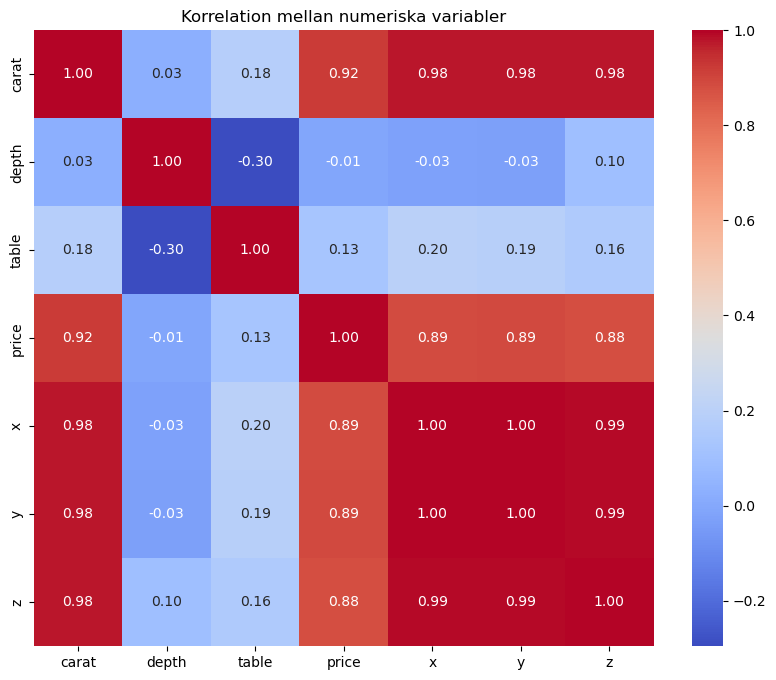

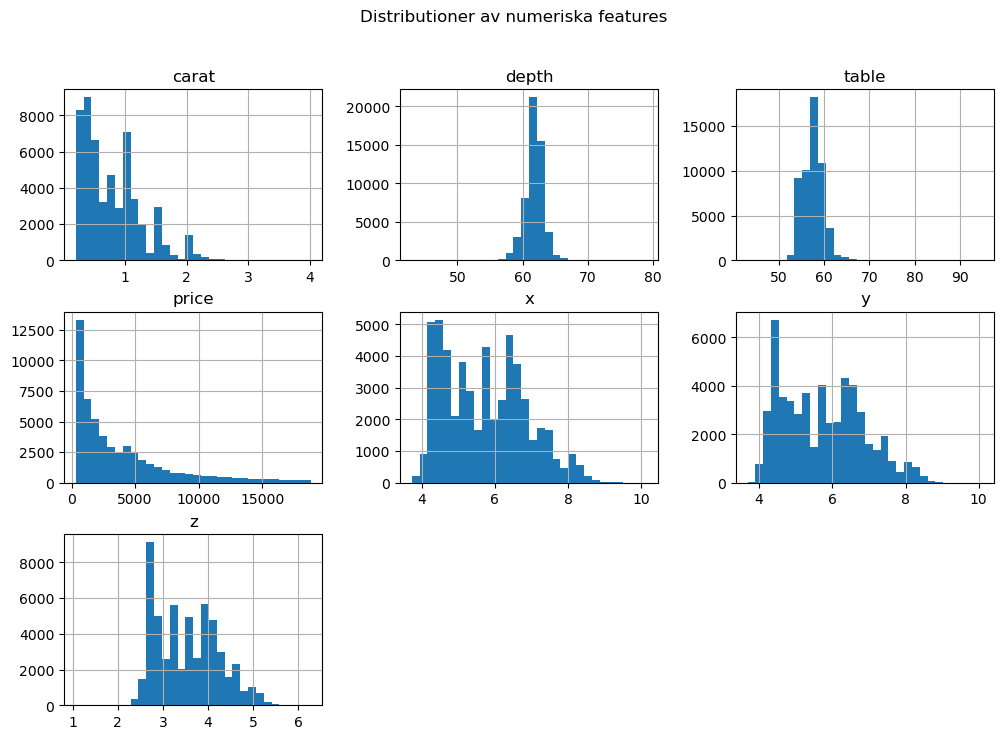

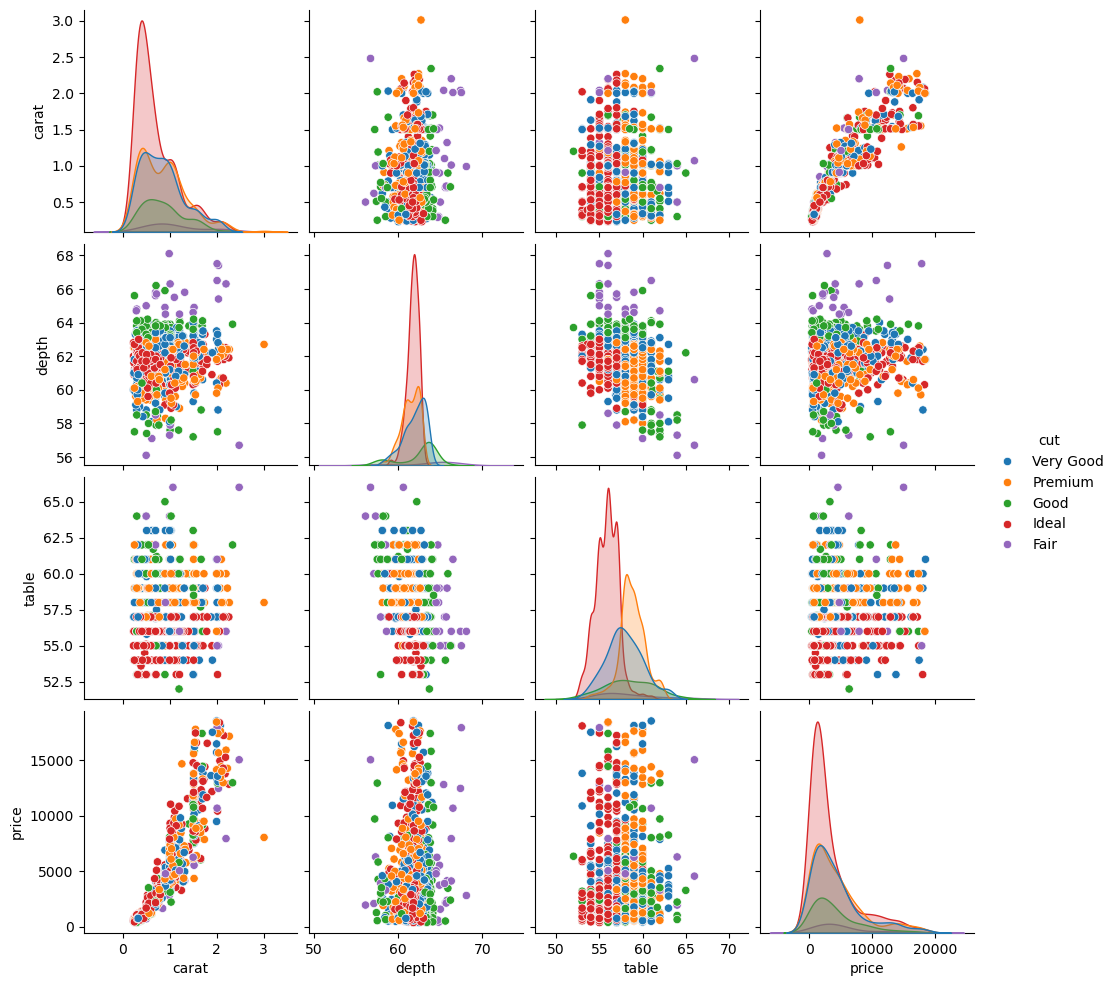

Linear Regression - RMSE: 1094.51, R2: 0.920
Ridge - RMSE: 1094.41, R2: 0.920
Lasso - RMSE: 1094.51, R2: 0.920
Random Forest - RMSE: 21.32, R2: 1.000
Gradient Boosting - RMSE: 143.00, R2: 0.999

--- Modellresultat ---
                          RMSE        R2
Random Forest        21.317777  0.999970
Gradient Boosting   142.999566  0.998642
Ridge              1094.412554  0.920451
Lasso              1094.510244  0.920436
Linear Regression  1094.511355  0.920436


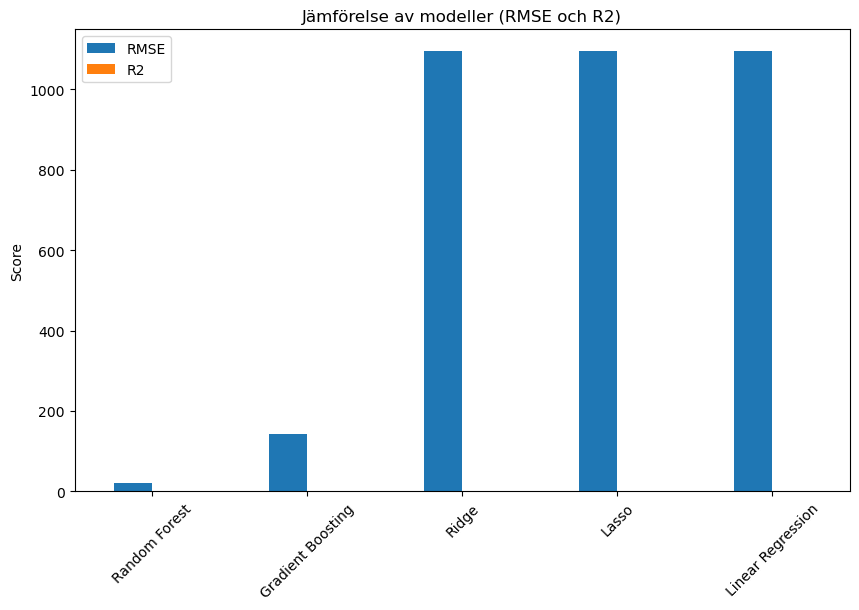

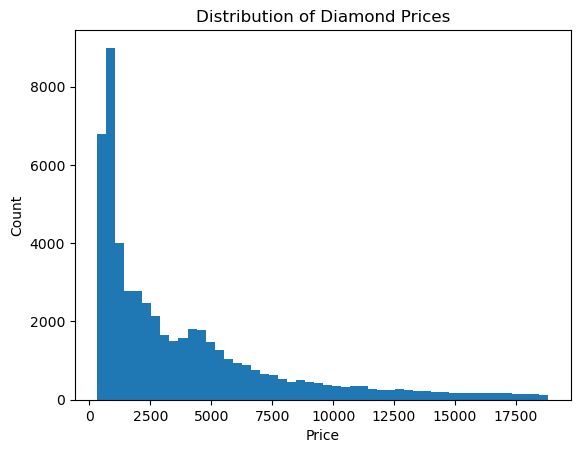

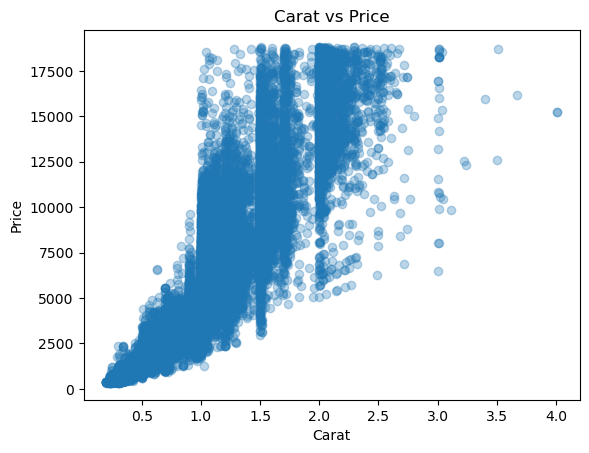

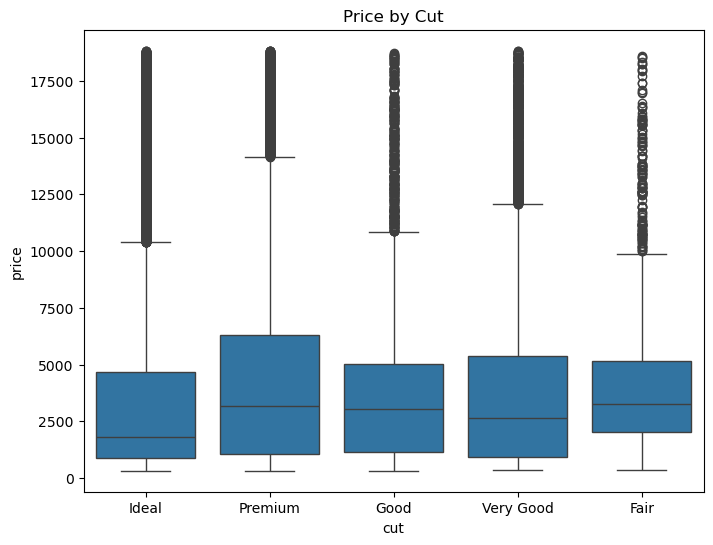

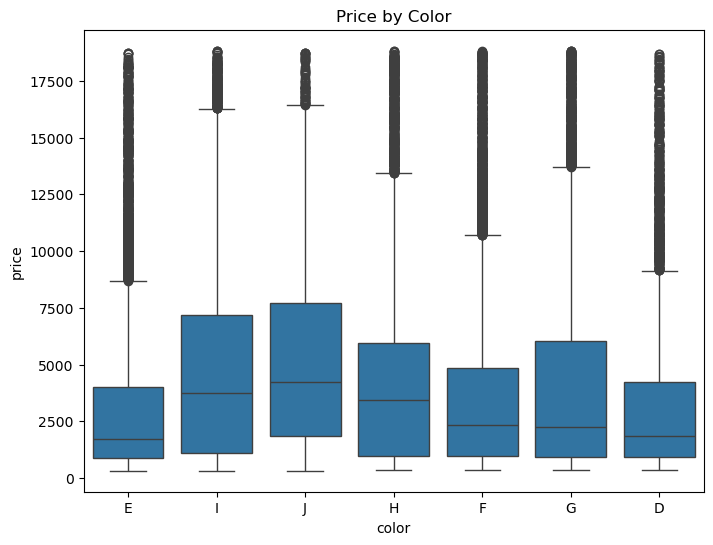

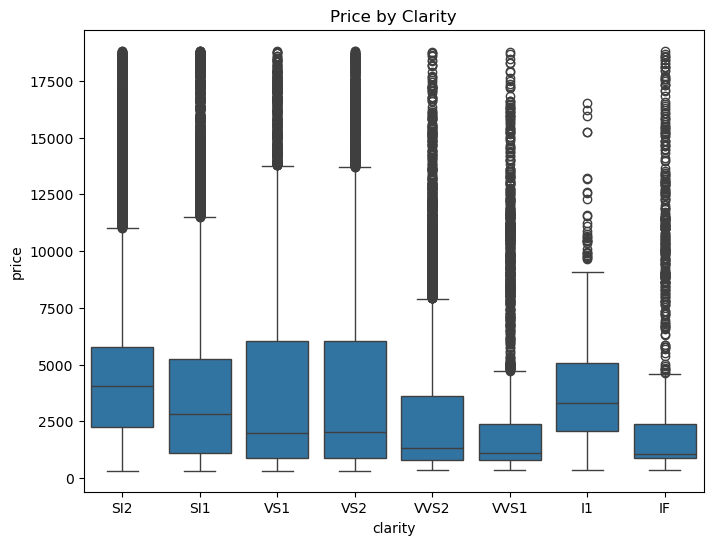

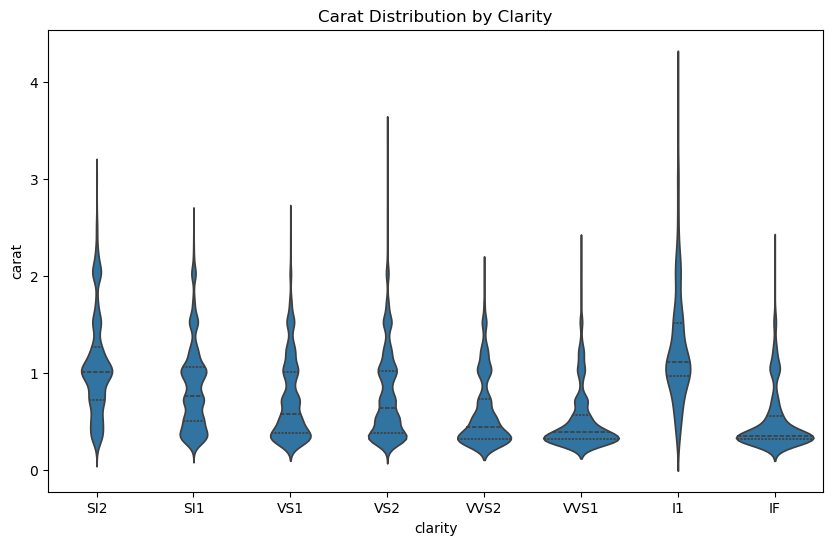

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# 1. Läs data
df = pd.read_csv("diamonds.csv", index_col=0)

# EDA (utforskande analys)
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Statistisk beskrivning ---")
print(df.describe())

print("\n--- Saknade värden ---")
print(df.isnull().sum())

# Avvikelsekontroll för x, y, z
print("\n--- Kontroll av icke-positiva värden i x, y, z ---")
invalid_xyz = df[(df["x"] <= 0) | (df["y"] <= 0) | (df["z"] <= 0)]
print(invalid_xyz[["carat","x","y","z","price"]])

# Filtrera bort dessa
if len(invalid_xyz) > 0:
    df = df.drop(invalid_xyz.index)
    print(f"Borttagna {len(invalid_xyz)} rader med icke-positiva xyz-värden.")

# Statistisk outlier-detektering (IQR-metoden)
outlier_indices = set()
for col in ["x", "y", "z"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers i {col}: {len(outliers)} st")
    outlier_indices.update(outliers.index)

# Rapportera och ta bort outliers
outlier_list = list(outlier_indices)
df_outliers = df.loc[outlier_list]
print(f"\nTotalt {len(df_outliers)} rader flaggade som outliers i x, y eller z.")
print(df_outliers[["carat","x","y","z","price"]].head())

if len(df_outliers) > 0:
    df = df.drop(outlier_list)
    print(f"Totalt {len(df_outliers)} outliers borttagna.")

numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if not col.startswith("Unnamed")]

# Korrelationer
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelation mellan numeriska variabler")
plt.show()

# Distributioner av numeriska variabler (exkludera ev. Unnamed-kolumner)
df[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distributioner av numeriska features")
plt.show()

# Pairplot för att se samband mellan några features
sns.pairplot(df.sample(1000), vars=["carat", "depth", "table", "price"], hue="cut")
plt.show()

# 2. Features
X = df.drop("price", axis=1)
y = df["price"]

cat_cols = ["cut", "color", "clarity"]
num_cols = X.drop(cat_cols, axis=1).columns

# 3. Preprocessing
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first"), cat_cols)
])

# 4. Train/test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# 5. Modeller
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001, max_iter=5000),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, random_state=42)
}

results = {}

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2": r2}
    print(f"{name} - RMSE: {rmse:.2f}, R2: {r2:.3f}")

# 6. Resultatjämförelse
res_df = pd.DataFrame(results).T.sort_values("R2", ascending=False)
print("\n--- Modellresultat ---")
print(res_df)

res_df.plot(kind="bar", figsize=(10, 6))
plt.title("Jämförelse av modeller (RMSE och R2)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

# 7. EDA plots
# Prisfördelning
plt.hist(df["price"], bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Diamond Prices")
plt.show()

# Samband carat vs pris
plt.scatter(df["carat"], df["price"], alpha=0.3)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Carat vs Price")
plt.show()

# Boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x="cut", y="price", data=df)
plt.title("Price by Cut")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x="color", y="price", data=df)
plt.title("Price by Color")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x="clarity", y="price", data=df)
plt.title("Price by Clarity")
plt.show()

# Carat distribution per clarity
plt.figure(figsize=(10, 6))
sns.violinplot(x="clarity", y="carat", data=df, inner="quart")
plt.title("Carat Distribution by Clarity")
plt.show()


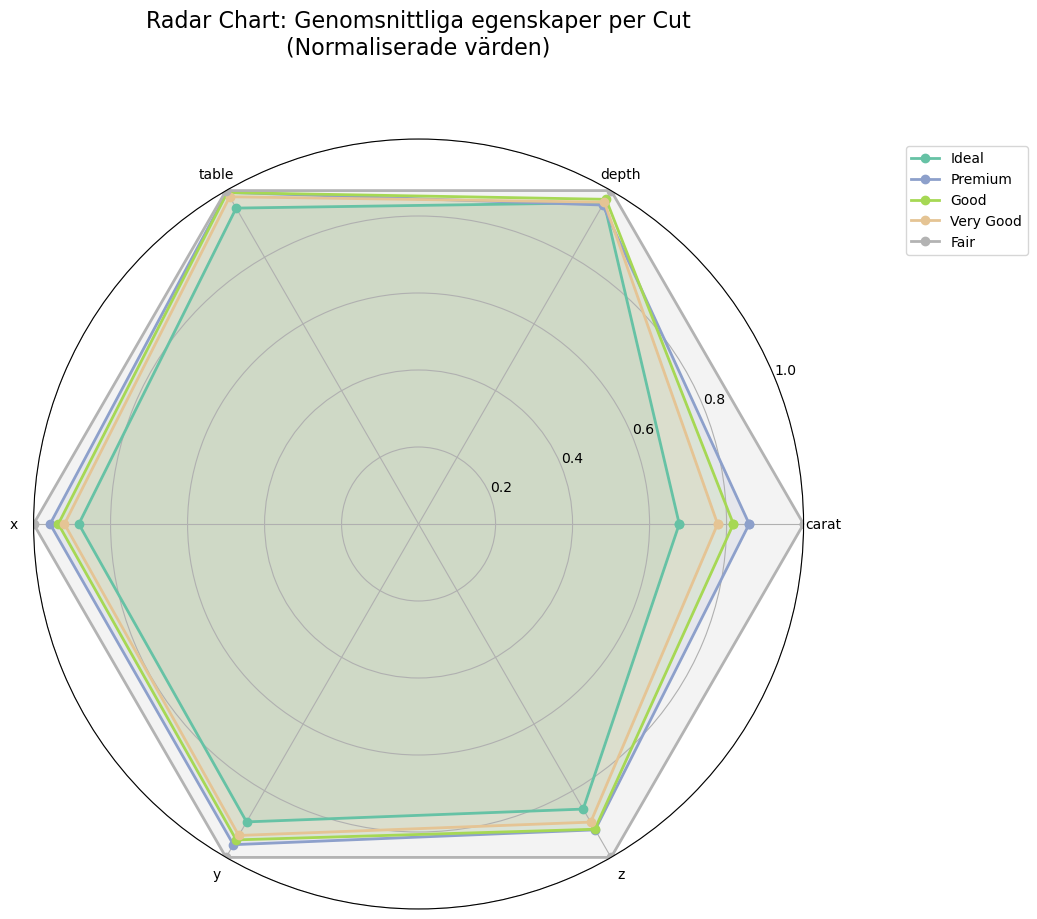

In [116]:
# RADAR CHART för genomsnittsvärden per cut
from math import pi

cuts = df['cut'].unique()
metrics = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Beräkna genomsnitt per cut och normalisera
cut_means = df.groupby('cut')[metrics].mean()
cut_means_norm = cut_means.div(cut_means.max())

# Skapa radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
angles += angles[:1]  # Komplettera cirkeln

colors = plt.cm.Set2(np.linspace(0, 1, len(cuts)))

for i, cut in enumerate(cuts):
    values = cut_means_norm.loc[cut].values.tolist()
    values += values[:1]  # Komplettera cirkeln
    
    ax.plot(angles, values, 'o-', linewidth=2, label=cut, color=colors[i])
    ax.fill(angles, values, alpha=0.15, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.set_title('Radar Chart: Genomsnittliga egenskaper per Cut\n(Normaliserade värden)', size=16, y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Sample data
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(data)

# Print results
print("Original Data:\n", data)
print("Scaled Data:\n", scaled_data)


Original Data:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
Scaled Data:
 [[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]
